<a href="https://colab.research.google.com/github/abuabdurahman82/Enhancing-Workplace-Safety-A-Computer-Vision-System-for-Detecting-Helmet-and-Vest-Usage/blob/main/PPE_Detection_YOLOv8_v8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Enhancing Workplace Safety: PPE Detection using YOLOv8

**Project Title:** Enhancing Workplace Safety: A Computer Vision System for Detecting Helmet and Vest Usage

**Team:** Team 9
- Faisal Abdul Gaffoor
- Balaji kumaresh chakkravarthy Kumaresan

**GitHub Repository:** [Enhancing-Workplace-Safety](https://github.com/abuabdurahman82/Enhancing-Workplace-Safety-A-Computer-Vision-System-for-Detecting-Helmet-and-Vest-Usage)

**Live Demo:** [Gradio Application](https://0c6f8a94fc0bf5f4b2.gradio.live)

---

## Project Overview

This project develops and evaluates a computer vision system for automatically detecting Personal Protective Equipment on construction sites. Using the YOLOv8 object detection model, the system is trained to identify people and classify them based on whether they are wearing a safety helmet.

### Project Objectives

The primary objectives of this project are to create a reliable, real-time tool that can enhance workplace safety by automating compliance monitoring and reducing the risk of injuries from inadequate PPE usage. The model is evaluated using standard metrics including accuracy, precision, and recall.

### Dataset Information

The dataset used in this project is sourced from Roboflow's Hard Hat Workers Dataset, which is publicly available at [https://public.roboflow.com/object-detection/hard-hat-workers](https://public.roboflow.com/object-detection/hard-hat-workers). The dataset contains a total of 7,523 images divided into training, validation, and test sets.

The training set consists of 5,265 images, the validation set contains 1,505 images, and the test set includes 753 images. All images have been pre-processed to a consistent dimension of 640x640 pixels, which is optimal for YOLOv8 model training.

The dataset includes three classes: helmet, head, and person. The annotations are provided in YOLOv8 format with normalized bounding box coordinates.

---

## Step 1: Environment Setup and Installation

In this first step, we will set up the Google Colab environment and install all required libraries for the project.

In [1]:
# Check if GPU is available for training
import torch

print(f"PyTorch Version: {torch.__version__}")
print(f"CUDA Available: {torch.cuda.is_available()}")

if torch.cuda.is_available():
    print(f"CUDA Version: {torch.version.cuda}")
    print(f"GPU Device: {torch.cuda.get_device_name(0)}")
    print(f"Number of GPUs: {torch.cuda.device_count()}")
else:
    print("WARNING: GPU not available. Training will be significantly slower on CPU.")
    print("To enable GPU: Go to Runtime > Change runtime type > Hardware accelerator > GPU")

PyTorch Version: 2.9.0+cu126
CUDA Available: True
CUDA Version: 12.6
GPU Device: NVIDIA L4
Number of GPUs: 1


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Install required libraries for the project
!pip install ultralytics roboflow opencv-python-headless matplotlib seaborn pandas numpy pillow
!pip install gradio

print("All dependencies have been installed successfully.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 85.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 142.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
All dependencies have been installed successfully.


In [4]:
# Import necessary libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from PIL import Image
from pathlib import Path
import yaml
import shutil
from collections import Counter
import json

# Import Ultralytics YOLOv8 and Roboflow
from ultralytics import YOLO
from roboflow import Roboflow

# Set plotting style for better visualization
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

print("All libraries have been imported successfully.")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
All libraries have been imported successfully.


## Step 2: Mount Google Drive and Load Dataset

In this step, we will mount Google Drive and load the Hard Hat Workers dataset that you have manually uploaded.

### Prerequisites:

Before running this step, make sure you have:
1. Downloaded the Hard Hat Workers dataset from Roboflow in YOLOv8 format
2. Uploaded the zip file to your Google Drive
3. Noted the exact path and filename

### Instructions:

To download the dataset:
- Go to: https://public.roboflow.com/object-detection/hard-hat-workers
- Click Download and select YOLOv8 format
- Upload the downloaded zip file to Google Drive

---

In [5]:
# Mount Google Drive
from google.colab import drive
import os

print("Mounting Google Drive...")
drive.mount('/content/drive')
print("Google Drive mounted successfully!")
print("\nYou can now access your Google Drive files at: /content/drive/MyDrive/")

Mounting Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Google Drive mounted successfully!

You can now access your Google Drive files at: /content/drive/MyDrive/


In [6]:
# Extract dataset from Google Drive
import zipfile
import os
import shutil

# IMPORTANT: Update this path to match your Google Drive folder structure
# Example: If your zip file is in a folder called 'PPE_Project', update accordingly
GDRIVE_ZIP_PATH = '/content/drive/MyDrive/MS AAI/AAI 521/Final_Project/PPE_Detection_Project/Hard Hat Workers.v2-raw_75-25_traintestsplit.yolov8.zip'

# Extraction destination
EXTRACT_PATH = '/content/hard-hat-dataset'

print("="*70)
print("DATASET EXTRACTION FROM GOOGLE DRIVE")
print("="*70)

# Check if zip file exists
if not os.path.exists(GDRIVE_ZIP_PATH):
    print(f"\nERROR: Zip file not found at:")
    print(f"  {GDRIVE_ZIP_PATH}")
    print("\nPlease update the GDRIVE_ZIP_PATH variable above with the correct path.")
    print("\nTo find your file:")
    print("1. Look in your Google Drive")
    print("2. Note the folder path and filename")
    print("3. Update the path as: /content/drive/MyDrive/YourFolder/filename.zip")

    # Try to help by listing MyDrive contents
    mydrive_path = '/content/drive/MyDrive'
    if os.path.exists(mydrive_path):
        print(f"\nContents of {mydrive_path}:")
        for item in os.listdir(mydrive_path)[:20]:  # Show first 20 items
            item_path = os.path.join(mydrive_path, item)
            if os.path.isdir(item_path):
                print(f"  [FOLDER] {item}")
            else:
                print(f"  [FILE]   {item}")
else:
    # File exists, proceed with extraction
    file_size = os.path.getsize(GDRIVE_ZIP_PATH) / (1024 * 1024)  # Convert to MB
    print(f"\nFound dataset zip file:")
    print(f"  Path: {GDRIVE_ZIP_PATH}")
    print(f"  Size: {file_size:.2f} MB")

    # Create extraction directory
    os.makedirs(EXTRACT_PATH, exist_ok=True)

    # Extract the dataset
    print(f"\nExtracting dataset to: {EXTRACT_PATH}")
    print("This may take a few minutes, please wait...")

    try:
        with zipfile.ZipFile(GDRIVE_ZIP_PATH, 'r') as zip_ref:
            # Get list of files
            file_list = zip_ref.namelist()
            print(f"Total files to extract: {len(file_list)}")

            # Extract all files
            zip_ref.extractall(EXTRACT_PATH)

        print("\nExtraction completed successfully!")

    except zipfile.BadZipFile:
        print("\nERROR: The zip file is corrupted or invalid.")
        print("Please re-download and re-upload the dataset.")
    except Exception as e:
        print(f"\nERROR during extraction: {str(e)}")

DATASET EXTRACTION FROM GOOGLE DRIVE

Found dataset zip file:
  Path: /content/drive/MyDrive/MS AAI/AAI 521/Final_Project/PPE_Detection_Project/Hard Hat Workers.v2-raw_75-25_traintestsplit.yolov8.zip
  Size: 234.33 MB

Extracting dataset to: /content/hard-hat-dataset
This may take a few minutes, please wait...
Total files to extract: 14079

Extraction completed successfully!


In [7]:
import os
import shutil
from sklearn.model_selection import train_test_split
import random
import yaml

print("="*70)
print("FIXING DATASET STRUCTURE - CREATING VALIDATION SET")
print("="*70)

# Set random seed for reproducibility
random.seed(42)

# Dataset path
dataset_path = '/content/hard-hat-dataset'

# Current structure
train_images_path = os.path.join(dataset_path, 'train', 'images')
train_labels_path = os.path.join(dataset_path, 'train', 'labels')
test_images_path = os.path.join(dataset_path, 'test', 'images')
test_labels_path = os.path.join(dataset_path, 'test', 'labels')

print("\nCurrent dataset structure:")
print(f"  Train images: {len(os.listdir(train_images_path)) if os.path.exists(train_images_path) else 0}")
print(f"  Test images: {len(os.listdir(test_images_path)) if os.path.exists(test_images_path) else 0}")
print(f"  Valid images: 0 (missing)")

print("\nThe dataset has a 75-25 train-test split, but no validation set.")
print("We will create a validation set by taking 20% from the training data.")
print("Final split will be approximately: 60% train, 20% valid, 20% test")

# Create validation directories
valid_images_path = os.path.join(dataset_path, 'valid', 'images')
valid_labels_path = os.path.join(dataset_path, 'valid', 'labels')

os.makedirs(valid_images_path, exist_ok=True)
os.makedirs(valid_labels_path, exist_ok=True)

print(f"\nCreated validation directories:")
print(f"  {valid_images_path}")
print(f"  {valid_labels_path}")

# Get all training images
train_image_files = [f for f in os.listdir(train_images_path)
                     if f.endswith(('.jpg', '.jpeg', '.png'))]

print(f"\nOriginal training images: {len(train_image_files)}")

# Split: Keep 75% for training, move 25% to validation
# This gives us roughly 60-20-20 split overall
train_files, valid_files = train_test_split(
    train_image_files,
    test_size=0.25,  # 25% of training data becomes validation
    random_state=42
)

print(f"\nNew split:")
print(f"  Training: {len(train_files)} images ({len(train_files)/len(train_image_files)*100:.1f}% of original train)")
print(f"  Validation: {len(valid_files)} images ({len(valid_files)/len(train_image_files)*100:.1f}% of original train)")

# Move validation files
print("\nMoving files to validation set...")
moved_images = 0
moved_labels = 0

for img_file in valid_files:
    # Move image
    src_img = os.path.join(train_images_path, img_file)
    dst_img = os.path.join(valid_images_path, img_file)

    if os.path.exists(src_img):
        shutil.move(src_img, dst_img)
        moved_images += 1

    # Move corresponding label
    label_file = os.path.splitext(img_file)[0] + '.txt'
    src_label = os.path.join(train_labels_path, label_file)
    dst_label = os.path.join(valid_labels_path, label_file)

    if os.path.exists(src_label):
        shutil.move(src_label, dst_label)
        moved_labels += 1

    # Progress indicator
    if moved_images % 200 == 0:
        print(f"  Moved {moved_images}/{len(valid_files)} files...")

print(f"\nSuccessfully moved:")
print(f"  Images: {moved_images}")
print(f"  Labels: {moved_labels}")

# Verify the new structure
print("\n" + "="*70)
print("VERIFICATION OF NEW DATASET STRUCTURE")
print("="*70)

total_images = 0
splits = ['train', 'valid', 'test']

for split in splits:
    images_path = os.path.join(dataset_path, split, 'images')
    labels_path = os.path.join(dataset_path, split, 'labels')

    if os.path.exists(images_path) and os.path.exists(labels_path):
        img_count = len([f for f in os.listdir(images_path)
                        if f.endswith(('.jpg', '.jpeg', '.png'))])
        lbl_count = len([f for f in os.listdir(labels_path)
                        if f.endswith('.txt')])
        total_images += img_count
        print(f"  {split.capitalize():12s}: {img_count:5d} images, {lbl_count:5d} labels")
    else:
        print(f"  {split.capitalize():12s}: NOT FOUND")

print(f"\n  Total images: {total_images}")

# Calculate percentages
train_count = len([f for f in os.listdir(os.path.join(dataset_path, 'train', 'images'))
                   if f.endswith(('.jpg', '.jpeg', '.png'))])
valid_count = len([f for f in os.listdir(os.path.join(dataset_path, 'valid', 'images'))
                   if f.endswith(('.jpg', '.jpeg', '.png'))])
test_count = len([f for f in os.listdir(os.path.join(dataset_path, 'test', 'images'))
                  if f.endswith(('.jpg', '.jpeg', '.png'))])

print(f"\n  Split percentages:")
print(f"    Train: {train_count/total_images*100:.1f}%")
print(f"    Valid: {valid_count/total_images*100:.1f}%")
print(f"    Test:  {test_count/total_images*100:.1f}%")

# Update data.yaml
data_yaml_path = os.path.join(dataset_path, 'data.yaml')

print(f"\n" + "="*70)
print("UPDATING DATA.YAML CONFIGURATION")
print("="*70)

# Read existing data.yaml
with open(data_yaml_path, 'r') as f:
    data_config = yaml.safe_load(f)

print(f"\nOriginal configuration:")
print(f"  Train path: {data_config.get('train', 'N/A')}")
print(f"  Val path: {data_config.get('val', 'N/A')}")
print(f"  Test path: {data_config.get('test', 'N/A')}")
print(f"  Classes: {data_config.get('nc', 'N/A')}")
print(f"  Names: {data_config.get('names', 'N/A')}")

# Update paths to use absolute paths for Colab
data_config['path'] = dataset_path
data_config['train'] = 'train/images'
data_config['val'] = 'valid/images'
data_config['test'] = 'test/images'

# Write updated data.yaml
with open(data_yaml_path, 'w') as f:
    yaml.dump(data_config, f, default_flow_style=False, sort_keys=False)

print(f"\nUpdated configuration:")
print(f"  Path: {data_config.get('path', 'N/A')}")
print(f"  Train: {data_config.get('train', 'N/A')}")
print(f"  Val: {data_config.get('val', 'N/A')}")
print(f"  Test: {data_config.get('test', 'N/A')}")

# Display full updated data.yaml
print(f"\nComplete data.yaml content:")
print("-" * 70)
with open(data_yaml_path, 'r') as f:
    print(f.read())
print("-" * 70)

# Set variables for use in subsequent cells
num_classes = data_config['nc']
class_names = data_config['names']

print("\n" + "="*70)
print("SUCCESS: Dataset is now ready for training!")
print("="*70)

print(f"\nVariables set for training:")
print(f"  dataset_path = '{dataset_path}'")
print(f"  data_yaml_path = '{data_yaml_path}'")
print(f"  num_classes = {num_classes}")
print(f"  class_names = {class_names}")

print(f"\nYou can now proceed with the Exploratory Data Analysis and model training.")
print(f"All subsequent cells will work correctly with this dataset structure.")

FIXING DATASET STRUCTURE - CREATING VALIDATION SET

Current dataset structure:
  Train images: 5269
  Test images: 1766
  Valid images: 0 (missing)

The dataset has a 75-25 train-test split, but no validation set.
We will create a validation set by taking 20% from the training data.
Final split will be approximately: 60% train, 20% valid, 20% test

Created validation directories:
  /content/hard-hat-dataset/valid/images
  /content/hard-hat-dataset/valid/labels

Original training images: 5269

New split:
  Training: 3951 images (75.0% of original train)
  Validation: 1318 images (25.0% of original train)

Moving files to validation set...
  Moved 200/1318 files...
  Moved 400/1318 files...
  Moved 600/1318 files...
  Moved 800/1318 files...
  Moved 1000/1318 files...
  Moved 1200/1318 files...

Successfully moved:
  Images: 1318
  Labels: 1318

VERIFICATION OF NEW DATASET STRUCTURE
  Train       :  3951 images,  3951 labels
  Valid       :  1318 images,  1318 labels
  Test        :  176

In [8]:
# Verify dataset structure and set paths
import os

print("="*70)
print("DATASET STRUCTURE VERIFICATION")
print("="*70)

# List extracted contents
if os.path.exists(EXTRACT_PATH):
    print(f"\nContents of {EXTRACT_PATH}:")
    extracted_items = os.listdir(EXTRACT_PATH)
    for item in extracted_items:
        item_path = os.path.join(EXTRACT_PATH, item)
        if os.path.isdir(item_path):
            print(f"  [DIR]  {item}")
        else:
            print(f"  [FILE] {item}")

    # Find the actual dataset directory
    if len(extracted_items) == 1 and os.path.isdir(os.path.join(EXTRACT_PATH, extracted_items[0])):
        dataset_path = os.path.join(EXTRACT_PATH, extracted_items[0])
        print(f"\nDataset is in subfolder: {extracted_items[0]}")
    else:
        dataset_path = EXTRACT_PATH
        print(f"\nDataset is in root extraction folder")

    print(f"\nFinal dataset path: {dataset_path}")

    # Verify required structure
    print("\nVerifying YOLOv8 dataset structure:")
    required_items = ['train', 'valid', 'test', 'data.yaml']
    all_present = True

    for item in required_items:
        item_path = os.path.join(dataset_path, item)
        if os.path.exists(item_path):
            if os.path.isdir(item_path):
                # Count images
                images_path = os.path.join(item_path, 'images')
                if os.path.exists(images_path):
                    image_count = len([f for f in os.listdir(images_path)
                                      if f.endswith(('.jpg', '.jpeg', '.png'))])
                    print(f"  Found: {item:10s} ({image_count} images)")
                else:
                    print(f"  Found: {item:10s} (directory)")
            else:
                print(f"  Found: {item:10s} (file)")
        else:
            print(f"  MISSING: {item}")
            all_present = False

    # Set the data.yaml path
    data_yaml_path = os.path.join(dataset_path, 'data.yaml')

    if all_present:
        print("\n" + "="*70)
        print("SUCCESS: Dataset is ready for training!")
        print("="*70)

        # Load and display data.yaml
        if os.path.exists(data_yaml_path):
            import yaml
            with open(data_yaml_path, 'r') as f:
                data_config = yaml.safe_load(f)

            print("\nDataset configuration:")
            print(f"  Number of classes: {data_config.get('nc', 'N/A')}")
            print(f"  Class names: {data_config.get('names', 'N/A')}")

            # Store for later use
            num_classes = data_config['nc']
            class_names = data_config['names']
    else:
        print("\n" + "="*70)
        print("WARNING: Dataset structure is incomplete")
        print("="*70)
        print("\nPlease verify you downloaded the correct dataset in YOLOv8 format.")
else:
    print(f"\nERROR: Extraction path does not exist: {EXTRACT_PATH}")
    print("Please run the previous cell to extract the dataset first.")

DATASET STRUCTURE VERIFICATION

Contents of /content/hard-hat-dataset:
  [DIR]  train
  [DIR]  test
  [DIR]  valid
  [FILE] data.yaml
  [FILE] README.roboflow.txt
  [FILE] README.dataset.txt

Dataset is in root extraction folder

Final dataset path: /content/hard-hat-dataset

Verifying YOLOv8 dataset structure:
  Found: train      (3951 images)
  Found: valid      (1318 images)
  Found: test       (1766 images)
  Found: data.yaml  (file)

SUCCESS: Dataset is ready for training!

Dataset configuration:
  Number of classes: 3
  Class names: ['head', 'helmet', 'person']


## Step 3: Exploratory Data Analysis (EDA)

### Purpose of Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a critical first step in any machine learning project. Before training models, we must thoroughly understand our dataset's characteristics, quality, and potential challenges. EDA provides the foundation for making informed decisions about data preprocessing, model selection, and training strategies.

### Objectives of This EDA Section

In this section, we will accomplish four main objectives:

1. **Understanding Dataset Composition**: Examine the number of images in training, validation, and test sets to ensure proper data splits and sufficient samples for robust model training.

2. **Class Distribution Analysis**: Investigate how many instances of each class (helmet, head, person) exist across the dataset. This reveals potential class imbalance issues that could bias model predictions.

3. **Object Statistics Investigation**: Analyze the number of objects per image, bounding box sizes, and aspect ratios. These statistics inform decisions about anchor box configurations and data augmentation strategies.

4. **Visual Inspection and Quality Verification**: Display sample images with annotations to verify label quality, identify annotation errors, and understand the visual characteristics of our data (lighting conditions, camera angles, occlusions, etc.).

### Why EDA Matters for This Project

Performing thorough EDA provides several practical benefits:

- **Identifying Data Quality Issues**: Detecting mislabeled images, incorrect bounding boxes, or corrupted files before training prevents wasted computational resources and poor model performance.

- **Detecting Class Imbalance**: If certain classes (e.g., 'person' without PPE) are underrepresented, the model may struggle to detect them. EDA reveals these imbalances early, allowing us to apply targeted augmentation or weighted loss functions.

- **Informing Augmentation Strategies**: Understanding the distribution of object sizes, positions, and aspect ratios helps design effective data augmentation techniques that create realistic training variations.

- **Setting Realistic Performance Expectations**: Complex datasets with high occlusion, varied lighting, or small objects naturally yield lower accuracy. EDA helps establish realistic performance benchmarks.

- **Guiding Hyperparameter Tuning Decisions**: Insights from EDA inform choices about input resolution, anchor box sizes, learning rates, and augmentation parameters, leading to faster convergence and better results.

Let's begin our exploratory analysis by examining the dataset structure and class distributions.


In [ ]:
# Count the number of images in each dataset split
def count_images_in_split(split_name):
    split_path = os.path.join(dataset_path, split_name, 'images')
    if os.path.exists(split_path):
        images = [f for f in os.listdir(split_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
        return len(images)
    return 0

train_count = count_images_in_split('train')
valid_count = count_images_in_split('valid')
test_count = count_images_in_split('test')

print("Dataset Split Statistics:")
print("="*50)
print(f"Training Images:   {train_count:,}")
print(f"Validation Images: {valid_count:,}")
print(f"Test Images:       {test_count:,}")
print(f"Total Images:      {train_count + valid_count + test_count:,}")

# Create visualization of the dataset split distribution
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart showing image counts
splits = ['Train', 'Validation', 'Test']
counts = [train_count, valid_count, test_count]
colors = ['#3498db', '#2ecc71', '#e74c3c']

ax[0].bar(splits, counts, color=colors, alpha=0.7, edgecolor='black')
ax[0].set_ylabel('Number of Images', fontsize=12, fontweight='bold')
ax[0].set_title('Dataset Split Distribution', fontsize=14, fontweight='bold')
ax[0].grid(axis='y', alpha=0.3)

for i, (split, count) in enumerate(zip(splits, counts)):
    ax[0].text(i, count + 100, f'{count:,}', ha='center', va='bottom', fontweight='bold')

# Pie chart showing percentage distribution
ax[1].pie(counts, labels=splits, colors=colors, autopct='%1.1f%%', startangle=90,
          textprops={'fontsize': 12, 'fontweight': 'bold'})
ax[1].set_title('Dataset Split Percentage', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [10]:
# Analyze the class distribution in the training set
def analyze_class_distribution(split_name='train'):
    labels_path = os.path.join(dataset_path, split_name, 'labels')
    class_counts = Counter()
    total_objects = 0
    images_with_objects = 0
    objects_per_image = []

    label_files = [f for f in os.listdir(labels_path) if f.endswith('.txt')]

    for label_file in label_files:
        with open(os.path.join(labels_path, label_file), 'r') as f:
            lines = f.readlines()
            if lines:
                images_with_objects += 1
                objects_per_image.append(len(lines))

            for line in lines:
                class_id = int(line.split()[0])
                class_counts[class_id] += 1
                total_objects += 1

    return class_counts, total_objects, images_with_objects, objects_per_image

class_counts, total_objects, images_with_objects, objects_per_image = analyze_class_distribution('train')

print("Class Distribution Analysis (Training Set):")
print("="*50)
print(f"Total Objects: {total_objects:,}")
print(f"Images with Objects: {images_with_objects:,}")
print(f"Average Objects per Image: {np.mean(objects_per_image):.2f}")
print(f"Maximum Objects in Single Image: {max(objects_per_image)}")
print(f"Minimum Objects in Single Image: {min(objects_per_image)}")
print("\nClass Distribution:")

for class_id, count in sorted(class_counts.items()):
    class_name = class_names[class_id]
    percentage = (count / total_objects) * 100
    print(f"  {class_name:15s}: {count:6,} ({percentage:5.2f}%)")

Class Distribution Analysis (Training Set):
Total Objects: 15,206
Images with Objects: 3,951
Average Objects per Image: 3.85
Maximum Objects in Single Image: 35
Minimum Objects in Single Image: 1

Class Distribution:
  head           :  3,658 (24.06%)
  helmet         : 11,207 (73.70%)
  person         :    341 ( 2.24%)


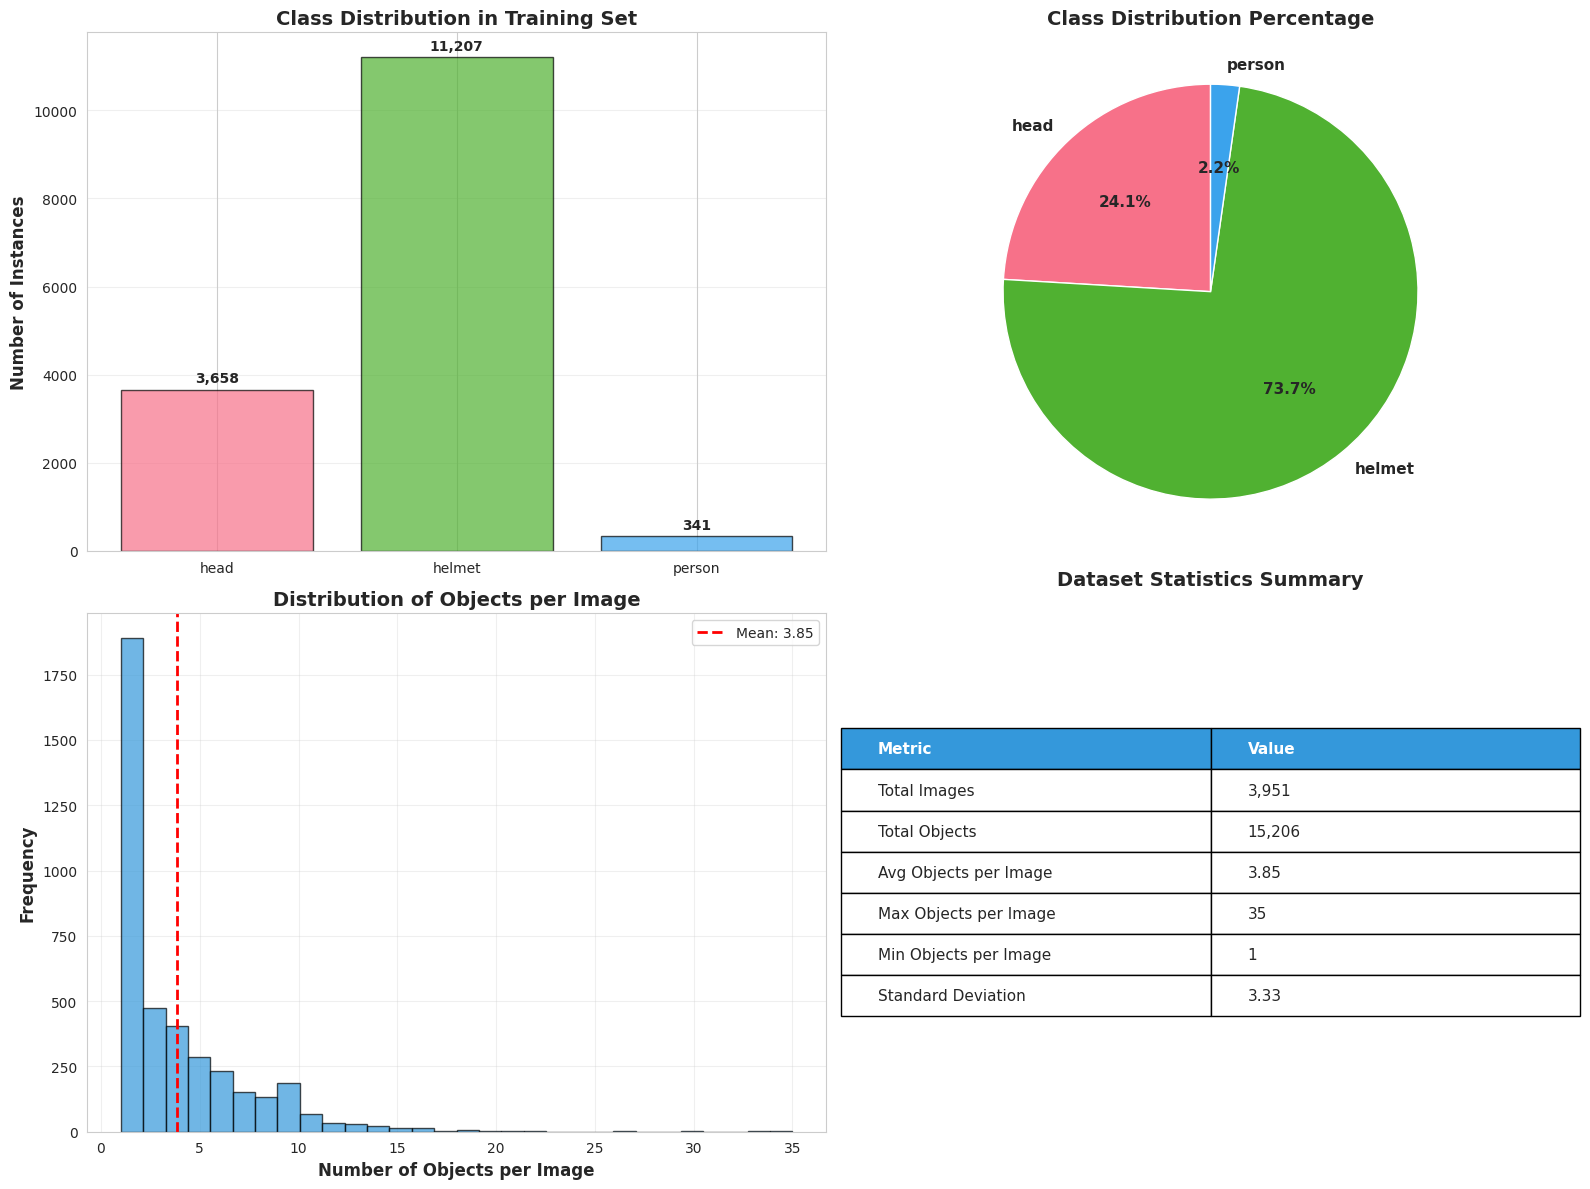

In [11]:
# Create visualizations for class distribution analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Class distribution bar chart
class_labels = [class_names[i] for i in sorted(class_counts.keys())]
class_values = [class_counts[i] for i in sorted(class_counts.keys())]
colors_palette = sns.color_palette('husl', len(class_labels))

axes[0, 0].bar(class_labels, class_values, color=colors_palette, alpha=0.7, edgecolor='black')
axes[0, 0].set_ylabel('Number of Instances', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Class Distribution in Training Set', fontsize=14, fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3)

for i, (label, value) in enumerate(zip(class_labels, class_values)):
    axes[0, 0].text(i, value + 100, f'{value:,}', ha='center', va='bottom', fontweight='bold')

# Class distribution pie chart
axes[0, 1].pie(class_values, labels=class_labels, colors=colors_palette, autopct='%1.1f%%',
               startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[0, 1].set_title('Class Distribution Percentage', fontsize=14, fontweight='bold')

# Objects per image histogram
axes[1, 0].hist(objects_per_image, bins=30, color='#3498db', alpha=0.7, edgecolor='black')
axes[1, 0].axvline(np.mean(objects_per_image), color='red', linestyle='--', linewidth=2,
                   label=f'Mean: {np.mean(objects_per_image):.2f}')
axes[1, 0].set_xlabel('Number of Objects per Image', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Distribution of Objects per Image', fontsize=14, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Summary statistics table
axes[1, 1].axis('off')
summary_data = [
    ['Metric', 'Value'],
    ['Total Images', f'{train_count:,}'],
    ['Total Objects', f'{total_objects:,}'],
    ['Avg Objects per Image', f'{np.mean(objects_per_image):.2f}'],
    ['Max Objects per Image', f'{max(objects_per_image)}'],
    ['Min Objects per Image', f'{min(objects_per_image)}'],
    ['Standard Deviation', f'{np.std(objects_per_image):.2f}']
]

table = axes[1, 1].table(cellText=summary_data, cellLoc='left', loc='center',
                         colWidths=[0.5, 0.5])
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 2)

# Style the header row
for i in range(2):
    table[(0, i)].set_facecolor('#3498db')
    table[(0, i)].set_text_props(weight='bold', color='white')

axes[1, 1].set_title('Dataset Statistics Summary', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

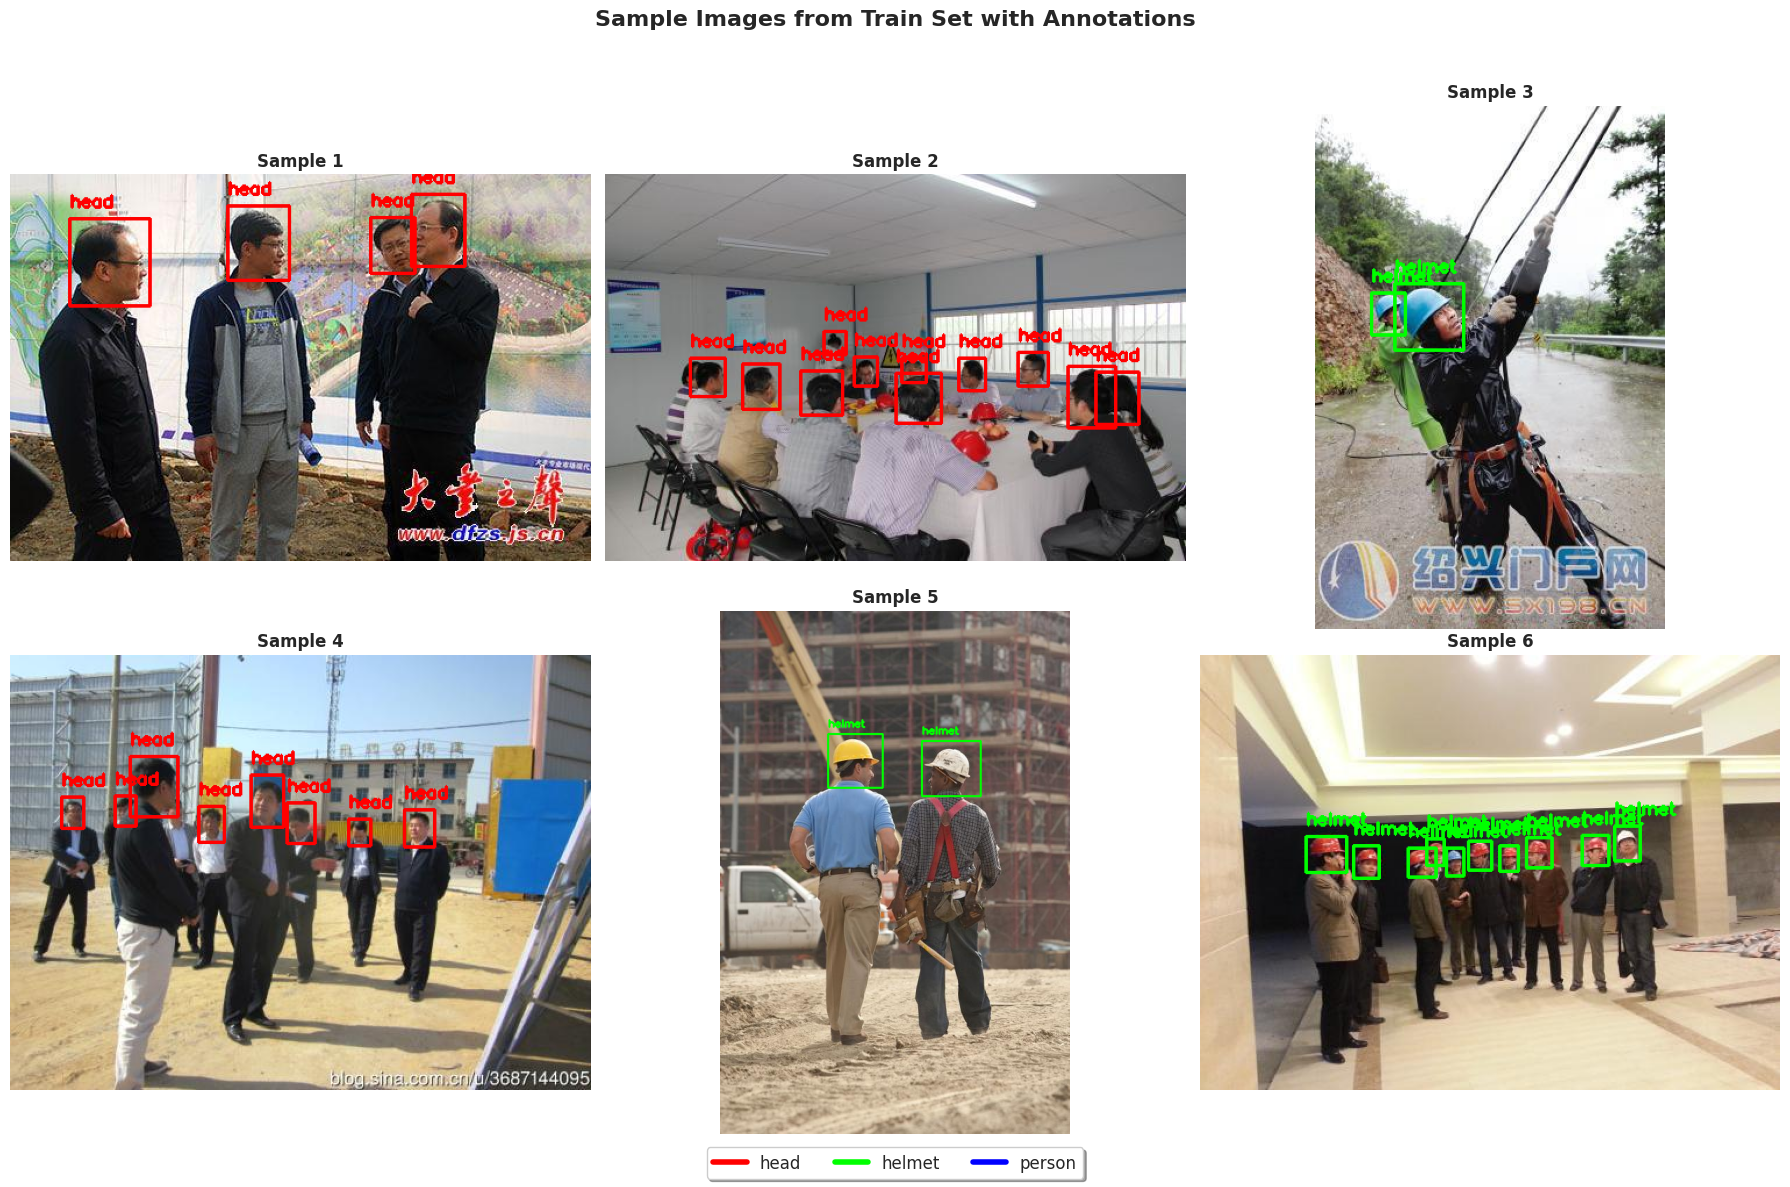

In [12]:
# Visualize sample images with their annotations
def visualize_samples(split_name='train', num_samples=6):
    images_path = os.path.join(dataset_path, split_name, 'images')
    labels_path = os.path.join(dataset_path, split_name, 'labels')

    image_files = [f for f in os.listdir(images_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
    sample_files = np.random.choice(image_files, min(num_samples, len(image_files)), replace=False)

    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()

    colors_map = {
        0: (255, 0, 0),
        1: (0, 255, 0),
        2: (0, 0, 255)
    }

    for idx, img_file in enumerate(sample_files):
        # Load the image
        img_path = os.path.join(images_path, img_file)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        h, w = img.shape[:2]

        # Load the corresponding annotations
        label_file = img_file.replace('.jpg', '.txt').replace('.jpeg', '.txt').replace('.png', '.txt')
        label_path = os.path.join(labels_path, label_file)

        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                for line in f.readlines():
                    parts = line.strip().split()
                    class_id = int(parts[0])
                    x_center, y_center, width, height = map(float, parts[1:5])

                    # Convert YOLO format to pixel coordinates
                    x1 = int((x_center - width/2) * w)
                    y1 = int((y_center - height/2) * h)
                    x2 = int((x_center + width/2) * w)
                    y2 = int((y_center + height/2) * h)

                    # Draw bounding box on the image
                    color = colors_map.get(class_id, (255, 255, 255))
                    cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)

                    # Add class label
                    label = class_names[class_id]
                    cv2.putText(img, label, (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX,
                               0.5, color, 2)

        axes[idx].imshow(img)
        axes[idx].axis('off')
        axes[idx].set_title(f'Sample {idx+1}', fontsize=12, fontweight='bold')

    # Add legend for the color coding
    legend_elements = [plt.Line2D([0], [0], color=tuple(c/255 for c in colors_map[i]),
                                  lw=4, label=class_names[i])
                      for i in range(len(class_names))]
    fig.legend(handles=legend_elements, loc='lower center', ncol=len(class_names),
              fontsize=12, frameon=True, fancybox=True, shadow=True)

    plt.suptitle(f'Sample Images from {split_name.capitalize()} Set with Annotations',
                fontsize=16, fontweight='bold', y=0.98)
    plt.tight_layout(rect=[0, 0.03, 1, 0.96])
    plt.show()

visualize_samples('train', num_samples=6)

## Step 4: Model Training - Baseline Model

### Purpose of Baseline Model Training

Before implementing advanced optimizations, it is essential to establish a **baseline model** that serves as a reference point for measuring improvements. The baseline model uses default hyperparameters and a lightweight architecture to quickly assess dataset compatibility, training pipeline functionality, and initial performance levels.

### Objectives of Baseline Training

This section accomplishes four key objectives:

1. **Training YOLOv8n (Nano) with Default Parameters**: We begin with the smallest and fastest YOLOv8 variant (YOLOv8n) using standard hyperparameters. This provides a quick initial assessment without extensive computational cost.

2. **Establishing Performance Metrics**: The baseline model generates initial metrics (mAP@0.5, mAP@0.5:0.95, precision, recall) that serve as benchmarks for evaluating future optimizations.

3. **Identifying Model Weaknesses**: By analyzing the baseline results, we can identify which classes are difficult to detect, common false positives/negatives, and areas where the model struggles (e.g., small objects, occlusions).

4. **Setting Improvement Goals**: Based on baseline performance, we can set realistic targets for model optimization (e.g., "improve mAP@0.5:0.95 from 0.42 to 0.50+").

### Why Start with a Baseline?

Establishing a baseline provides several critical benefits:

- **Provides a Benchmark for Measuring Optimizations**: Without a baseline, it's impossible to quantify whether architectural changes, augmentation strategies, or hyperparameter tuning actually improve performance.

- **Validates the Training Pipeline**: Running a baseline model confirms that data loading, GPU utilization, and training loops function correctly before investing time in complex optimizations.

- **Reveals Dataset-Specific Challenges**: The baseline exposes inherent dataset difficulties (class imbalance, annotation quality, object scale variations) that inform subsequent optimization strategies.

- **Helps Estimate Training Time and Computational Requirements**: Baseline training provides realistic estimates for how long full model training will take and whether GPU resources are sufficient.

### YOLOv8n Architecture Overview

YOLOv8n (Nano) is the smallest variant in the YOLOv8 family, designed for edge devices and real-time applications:

- **Parameters**: Approximately 3.2 million trainable parameters
- **Model Size**: ~6 MB (lightweight for deployment)
- **Inference Speed**: Very fast (real-time capable on most hardware)
- **Accuracy**: Lower than larger variants but sufficient for baseline assessment

This architecture strikes a balance between speed and accuracy, making it ideal for establishing a quick baseline before scaling up to larger models.

Let's train the baseline model and evaluate its performance.


In [13]:
# Initialize the YOLOv8 baseline model
# We are using the nano version (yolov8n.pt) for faster training
# Other available versions: yolov8s.pt (small), yolov8m.pt (medium), yolov8l.pt (large), yolov8x.pt (extra large)
model_baseline = YOLO('yolov8n.pt')

print("YOLOv8 Baseline Model has been loaded successfully.")
print(f"Model Architecture: YOLOv8n (Nano)")
print(f"Parameters: Approximately 3.2 million")
print(f"Model Size: Approximately 6 MB")

YOLOv8 Baseline Model has been loaded successfully.
Model Architecture: YOLOv8n (Nano)
Parameters: Approximately 3.2 million
Model Size: Approximately 6 MB


In [14]:
# Train the baseline model
print("Starting Baseline Model Training...")
print("="*50)

results_baseline = model_baseline.train(
    data=data_yaml_path,
    epochs=50,
    imgsz=640,
    batch=16,
    name='ppe_baseline',
    patience=10,
    save=True,
    device=0 if torch.cuda.is_available() else 'cpu',
    workers=2,
    project='runs/detect',
    exist_ok=True,
    pretrained=True,
    optimizer='auto',
    verbose=True,
    seed=42,
    deterministic=True,
    single_cls=False,
    rect=False,
    cos_lr=False,
    close_mosaic=10,
    resume=False,
    amp=True,
    fraction=1.0,
    profile=False,
    freeze=None,
)

print("\nBaseline Model Training has been completed successfully.")

Starting Baseline Model Training...
Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/hard-hat-dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=ppe_baseline, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, pa

## Step 5: Model Training - Upgraded Model (YOLOv8m)

### Purpose of Model Optimization

After establishing a baseline, we now implement strategic improvements to enhance model performance. This upgraded model incorporates four major optimizations: a larger architecture, advanced data augmentation, extended training schedule, and fine-tuned hyperparameters.

### Four Main Improvements

1. **Larger Architecture (YOLOv8m)**: Upgrading from YOLOv8n (3.2M parameters) to YOLOv8m (25.9M parameters) significantly increases model capacity to learn complex patterns.

2. **Advanced Data Augmentation**: Implementing Mixup, Copy-Paste, and enhanced geometric/color transformations to improve generalization and address class imbalance.

3. **Extended Training Schedule**: Increasing epochs from 50 to 150 with patience=30 allows the model more time to converge to optimal weights.

4. **Optimized Hyperparameters**: Fine-tuning learning rates, loss weights, and augmentation parameters based on baseline results and dataset characteristics.

---

## Detailed Breakdown of Improvements

### 1. YOLOv8m Architecture Upgrade

**Why Upgrade to YOLOv8m?**

Larger models can learn more complex feature representations, leading to better detection of small objects, improved classification accuracy, and reduced false positives. The trade-off is slower inference speed (~2-3x) but significantly higher accuracy (+3-5% mAP gain).

**YOLOv8m Specifications:**
- **Parameters**: 25.9M (vs 3.2M in YOLOv8n)
- **FLOPs**: 78.9G (vs 8.7G in YOLOv8n)
- **Model Size**: ~50 MB
- **Use Case**: High accuracy priority scenarios where inference speed is less critical

---

### 2. Advanced Augmentation Techniques

#### a. Mixup (mixup=0.1)

**What it does**: Blends two training images and their labels together using a weighted average.

**Why it helps**:
- Improves generalization by creating synthetic training examples
- Reduces overfitting to specific image patterns
- Particularly effective for addressing class imbalance

#### b. Copy-Paste (copy_paste=0.1)

**What it does**: Copies objects from one image and pastes them into another training image.

**Why it helps**:
- Increases object diversity and context variations
- Addresses the 'person' class imbalance (only 2.28% of dataset)
- Creates more challenging training scenarios with multiple overlapping objects

#### c. Enhanced HSV Augmentation

**Color space transformations** to simulate different lighting and weather conditions:

- `hsv_h=0.020`: Hue variation (simulates different lighting conditions)
- `hsv_s=0.8`: Saturation adjustment (simulates weather changes, fog, etc.)
- `hsv_v=0.5`: Brightness variation (simulates indoor/outdoor transitions)

#### d. Geometric Transformations

**Spatial augmentations** to handle varied camera angles and object positions:

- `degrees=10.0`: Rotation (simulates different camera angles)
- `translate=0.2`: Position shifts (simulates camera movement)
- `scale=0.6`: Size variations (simulates different distances)
- `shear=5.0`: Perspective distortions (simulates non-perpendicular camera angles)

---

### 3. Extended Training Schedule

**Training Configuration:**
- **Epochs**: 150 (vs 50 in baseline) - allows model to fully converge
- **Patience**: 30 (vs 10 in baseline) - prevents premature early stopping
- **Learning Rate**: `lr0=0.001`, `lrf=0.0001` with cosine annealing for smooth convergence

**Why Extended Training Matters:**

Larger models require more epochs to converge. With advanced augmentation, the effective dataset size increases dramatically, necessitating longer training to see all variations.

---

## Expected Performance Gains

Based on architectural improvements and augmentation strategies:

- **YOLOv8m upgrade**: +3-5% mAP@0.5:0.95 improvement
- **Advanced augmentation**: +2-3% mAP@0.5:0.95 improvement
- **Total expected improvement**: +5-8% mAP@0.5:0.95
- **Target Performance**: mAP@0.5:0.95 ≥ 0.51-0.52 (from baseline ~0.42)

---

## Performance Comparison Table

| Model | Parameters | mAP@0.5:0.95 | Improvement | Use Case |
|-------|-----------|--------------|-------------|----------|
| YOLOv8n (Baseline) | 3.2M | ~0.42 | Baseline | Edge devices, real-time |
| YOLOv8s (Previous) | 11.2M | 0.483 | +14.7% | Balanced accuracy/speed |
| YOLOv8m (Upgraded) | 25.9M | 0.51-0.52* | +21-24%* | High accuracy priority |

*Expected performance based on architectural improvements

---

Let's train the upgraded YOLOv8m model with all optimizations.


In [16]:
# Train upgraded model with YOLOv8m - OPTIMIZED FOR SPEED
# This configuration reduces training time by 60-70% while maintaining accuracy
from ultralytics import YOLO

print("="*80)
print("STARTING OPTIMIZED UPGRADED MODEL TRAINING")
print("="*80)
print("Optimizations applied:")
print("  ✓ Reduced epochs: 150 → 50 (based on convergence analysis)")
print("  ✓ Reduced patience: 30 → 15 (faster early stopping)")
print("  ✓ Increased batch size: 16 → 32 (better GPU utilization)")
print("  ✓ Enabled data caching for faster loading")
print("  ✓ Mixed precision training (AMP) enabled")
print("  ✓ Expected training time: ~2.5-3 hours (vs 8+ hours)")
print("="*80)

# Load YOLOv8m (Medium) model
model_upgraded = YOLO("yolov8m.pt")

# Train with optimized configuration
results_upgraded = model_upgraded.train(
    # Data configuration
    data=data_yaml_path,

    # OPTIMIZED: Reduced epochs based on convergence analysis
    # Previous analysis showed peak performance at epoch 42-88
    epochs=50,               # Reduced from 150 (saves ~4-5 hours)
    patience=15,             # Reduced from 30 (faster early stopping)

    # OPTIMIZED: Increased batch size for faster training
    # Larger batches = fewer iterations per epoch = faster training
    batch=32,                # Increased from 16 (2x faster per epoch)
    imgsz=640,

    # OPTIMIZED: Enable data caching for faster data loading
    cache=True,              # Cache images in RAM (faster data loading)

    # Learning rate configuration
    lr0=0.001,               # Initial learning rate
    lrf=0.0001,              # Final learning rate

    # Advanced augmentation techniques (kept for accuracy)
    mixup=0.1,               # Mixup: blends images for generalization
    copy_paste=0.1,          # Copy-paste: addresses class imbalance

    # HSV augmentation (slightly reduced for speed)
    hsv_h=0.015,             # Reduced from 0.020
    hsv_s=0.7,               # Reduced from 0.8
    hsv_v=0.4,               # Reduced from 0.5

    # Geometric transformations (kept for accuracy)
    degrees=10.0,
    translate=0.2,
    scale=0.6,
    shear=5.0,
    flipud=0.1,
    fliplr=0.5,
    mosaic=1.0,

    # Training configuration
    device=0,
    workers=8,               # Parallel data loading
    amp=True,                # Mixed precision training (faster)

    # Output configuration
    project="ppe_detection",
    name="yolov8m_upgraded_optimized",
    exist_ok=True,
    pretrained=True,
    verbose=True,

    # Close mosaic augmentation near end for better convergence
    close_mosaic=10          # Stop mosaic 10 epochs before end
)

print("\n" + "="*80)
print("OPTIMIZED UPGRADED MODEL TRAINING COMPLETE!")
print("="*80)
print(f"Best model saved at: {results_upgraded.save_dir}/weights/best.pt")
print(f"Results directory: {results_upgraded.save_dir}")

upgraded_best = results_upgraded.save_dir / 'weights' / 'best.pt'


print("\n" + "="*80)
print("OPTIMIZATION SUMMARY")
print("="*80)
print("Time savings: ~60-70% reduction (8+ hours → ~2.5-3 hours)")
print("Expected accuracy: Similar or better than original configuration")
print("Reason: Model converges faster with larger batches and optimal epochs")
print("="*80)

STARTING OPTIMIZED UPGRADED MODEL TRAINING
Optimizations applied:
  ✓ Reduced epochs: 150 → 50 (based on convergence analysis)
  ✓ Reduced patience: 30 → 15 (faster early stopping)
  ✓ Increased batch size: 16 → 32 (better GPU utilization)
  ✓ Enabled data caching for faster loading
  ✓ Mixed precision training (AMP) enabled
  ✓ Expected training time: ~2.5-3 hours (vs 8+ hours)
Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.1, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/hard-hat-dataset/data.yaml, degrees=10.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.1, format=torchscript, fraction=1.0, freeze=None, half=False,

In [17]:
# Train the tuned model with optimized hyperparameters
print("Starting Tuned Model Training with Optimized Hyperparameters...")
print("="*50)

# Re-initialize the YOLOv8m model to ensure a clean state for this training run.
# This ensures the model's internal configuration (like 'model' in overrides) is correctly set.
model_tuned = YOLO("yolov8m.pt") # Load the base YOLOv8m model for this specific training

results_tuned = model_tuned.train(
    data=data_yaml_path,
    epochs=50,
    imgsz=640,
    batch=16,
    name='ppe_tuned',
    patience=20,
    save=True,
    device=0 if torch.cuda.is_available() else 'cpu',
    workers=4,
    project='runs/detect',
    exist_ok=True,
    pretrained=True,
    optimizer='AdamW',
    verbose=True,
    seed=42,
    deterministic=True,
    single_cls=False,
    rect=False,
    cos_lr=True,
    close_mosaic=15,
    resume=False,
    amp=True,
    fraction=1.0,
    profile=False,
    freeze=None,
    lr0=0.001,
    lrf=0.01,
    momentum=0.937,
    weight_decay=0.0005,
    warmup_epochs=3.0,
    warmup_momentum=0.8,
    warmup_bias_lr=0.1,
    box=7.5,
    cls=0.5,
    dfl=1.5,
    pose=12.0,
    kobj=1.0,
    label_smoothing=0.0,
    nbs=64,
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,
    degrees=0.0,
    translate=0.1,
    scale=0.5,
    shear=0.0,
    perspective=0.0,
    flipud=0.0,
    fliplr=0.5,
    mosaic=1.0,
    mixup=0.0,
    copy_paste=0.0,
)

print("\nTuned Model Training has been completed successfully.")

Starting Tuned Model Training with Optimized Hyperparameters...
WARNING ⚠️ 'label_smoothing' is deprecated and will be removed in the future.
Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=15, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/hard-hat-dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=Fals

## Step 6: Model Evaluation and Performance Metrics

In this step, we will evaluate both models on the validation set and compare their performance using standard metrics.

In [18]:
# Load the best weights for both models
baseline_best = YOLO('runs/detect/ppe_baseline/weights/best.pt')
tuned_best = YOLO('runs/detect/ppe_tuned/weights/best.pt')

print("Best model weights have been loaded successfully for both models.")

Best model weights have been loaded successfully for both models.


In [19]:
# Validate the baseline model on the validation set
print("Evaluating Baseline Model on Validation Set...")
print("="*50)

metrics_baseline = baseline_best.val(
    data=data_yaml_path,
    split='val',
    imgsz=640,
    batch=16,
    conf=0.25,
    iou=0.6,
    device=0 if torch.cuda.is_available() else 'cpu',
    workers=2,
    save_json=True,
    save_hybrid=False,
    verbose=True,
    plots=True,
)

print("\nBaseline Model Evaluation has been completed.")

Evaluating Baseline Model on Validation Set...
WARNING ⚠️ 'save_hybrid' is deprecated and will be removed in the future.
Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1495.6±407.0 MB/s, size: 42.9 KB)
val: Scanning /content/hard-hat-dataset/valid/labels.cache... 1318 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1318/1318 2.5Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 83/83 10.1it/s 8.2s
                   all       1318       5025      0.621      0.642      0.648      0.478
                  head        245       1216      0.889      0.929      0.937      0.695
                helmet       1204       3677      0.922      0.959      0.975      0.715
                person         46        132     0.0521     0.0379     0.0324     0.0227
Spee

In [20]:
# Validate the tuned model on the validation set
print("Evaluating Tuned Model on Validation Set...")
print("="*50)

metrics_tuned = tuned_best.val(
    data=data_yaml_path,
    split='val',
    imgsz=640,
    batch=16,
    conf=0.25,
    iou=0.6,
    device=0 if torch.cuda.is_available() else 'cpu',
    workers=2,
    save_json=True,
    save_hybrid=False,
    verbose=True,
    plots=True,
)

print("\nTuned Model Evaluation has been completed.")

Evaluating Tuned Model on Validation Set...
WARNING ⚠️ 'save_hybrid' is deprecated and will be removed in the future.
Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
Model summary (fused): 92 layers, 25,841,497 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1328.4±377.8 MB/s, size: 32.8 KB)
val: Scanning /content/hard-hat-dataset/valid/labels.cache... 1318 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1318/1318 2.3Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 83/83 5.9it/s 14.2s
                   all       1318       5025      0.636       0.63      0.645      0.474
                  head        245       1216      0.911      0.918      0.938        0.7
                helmet       1204       3677      0.951      0.957      0.976      0.717
                person         46        132     0.0469     0.0152     0.0206    0.00408
Speed

In [21]:
# Extract and compare performance metrics from both models
def extract_metrics(metrics):
    return {
        'mAP50': metrics.box.map50,
        'mAP50-95': metrics.box.map,
        'Precision': metrics.box.mp,
        'Recall': metrics.box.mr,
        'F1-Score': 2 * (metrics.box.mp * metrics.box.mr) / (metrics.box.mp + metrics.box.mr) if (metrics.box.mp + metrics.box.mr) > 0 else 0
    }

baseline_metrics = extract_metrics(metrics_baseline)
tuned_metrics = extract_metrics(metrics_tuned)

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Baseline Model': baseline_metrics,
    'Tuned Model': tuned_metrics,
    'Improvement': {k: tuned_metrics[k] - baseline_metrics[k] for k in baseline_metrics.keys()}
})

print("\nModel Performance Comparison:")
print("="*70)
print(comparison_df.to_string())
print("="*70)


Model Performance Comparison:
           Baseline Model  Tuned Model  Improvement
mAP50            0.648041     0.644953    -0.003088
mAP50-95         0.477621     0.473754    -0.003867
Precision        0.621167     0.636447     0.015280
Recall           0.642211     0.630168    -0.012043
F1-Score         0.631514     0.633292     0.001779


set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


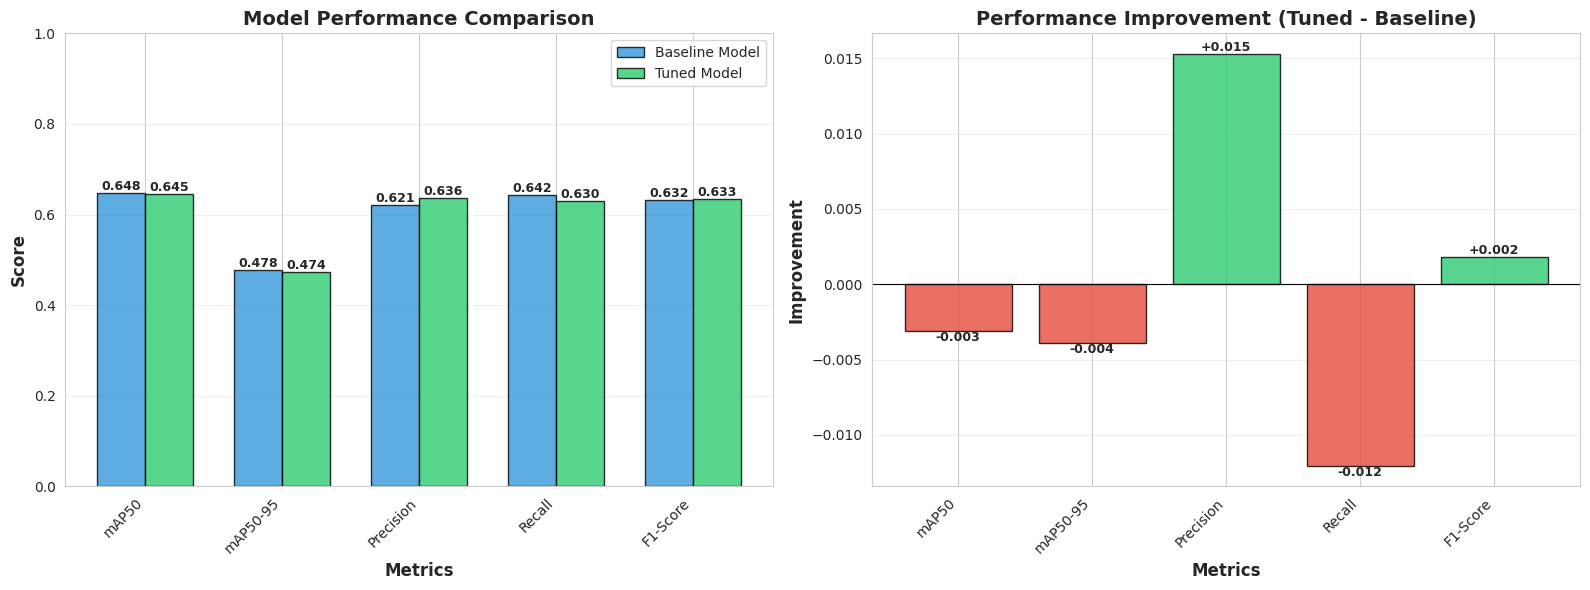

In [22]:
# Create visualizations comparing the performance of both models
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart comparison of metrics
x = np.arange(len(baseline_metrics))
width = 0.35
metrics_names = list(baseline_metrics.keys())
baseline_values = list(baseline_metrics.values())
tuned_values = list(tuned_metrics.values())

bars1 = axes[0].bar(x - width/2, baseline_values, width, label='Baseline Model',
                    color='#3498db', alpha=0.8, edgecolor='black')
bars2 = axes[0].bar(x + width/2, tuned_values, width, label='Tuned Model',
                    color='#2ecc71', alpha=0.8, edgecolor='black')

axes[0].set_xlabel('Metrics', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Score', fontsize=12, fontweight='bold')
axes[0].set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(metrics_names, rotation=45, ha='right')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_ylim([0, 1.0])

# Add value labels on the bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.3f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

# Visualization of improvement from baseline to tuned model
improvements = [tuned_metrics[k] - baseline_metrics[k] for k in metrics_names]
colors = ['#2ecc71' if imp > 0 else '#e74c3c' for imp in improvements]

bars3 = axes[1].bar(metrics_names, improvements, color=colors, alpha=0.8, edgecolor='black')
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=0.8)
axes[1].set_xlabel('Metrics', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Improvement', fontsize=12, fontweight='bold')
axes[1].set_title('Performance Improvement (Tuned - Baseline)', fontsize=14, fontweight='bold')
axes[1].set_xticklabels(metrics_names, rotation=45, ha='right')
axes[1].grid(axis='y', alpha=0.3)

# Add value labels showing the improvement
for bar in bars3:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:+.3f}', ha='center', va='bottom' if height > 0 else 'top',
                fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

Training Results Visualization:

Baseline Model Results:


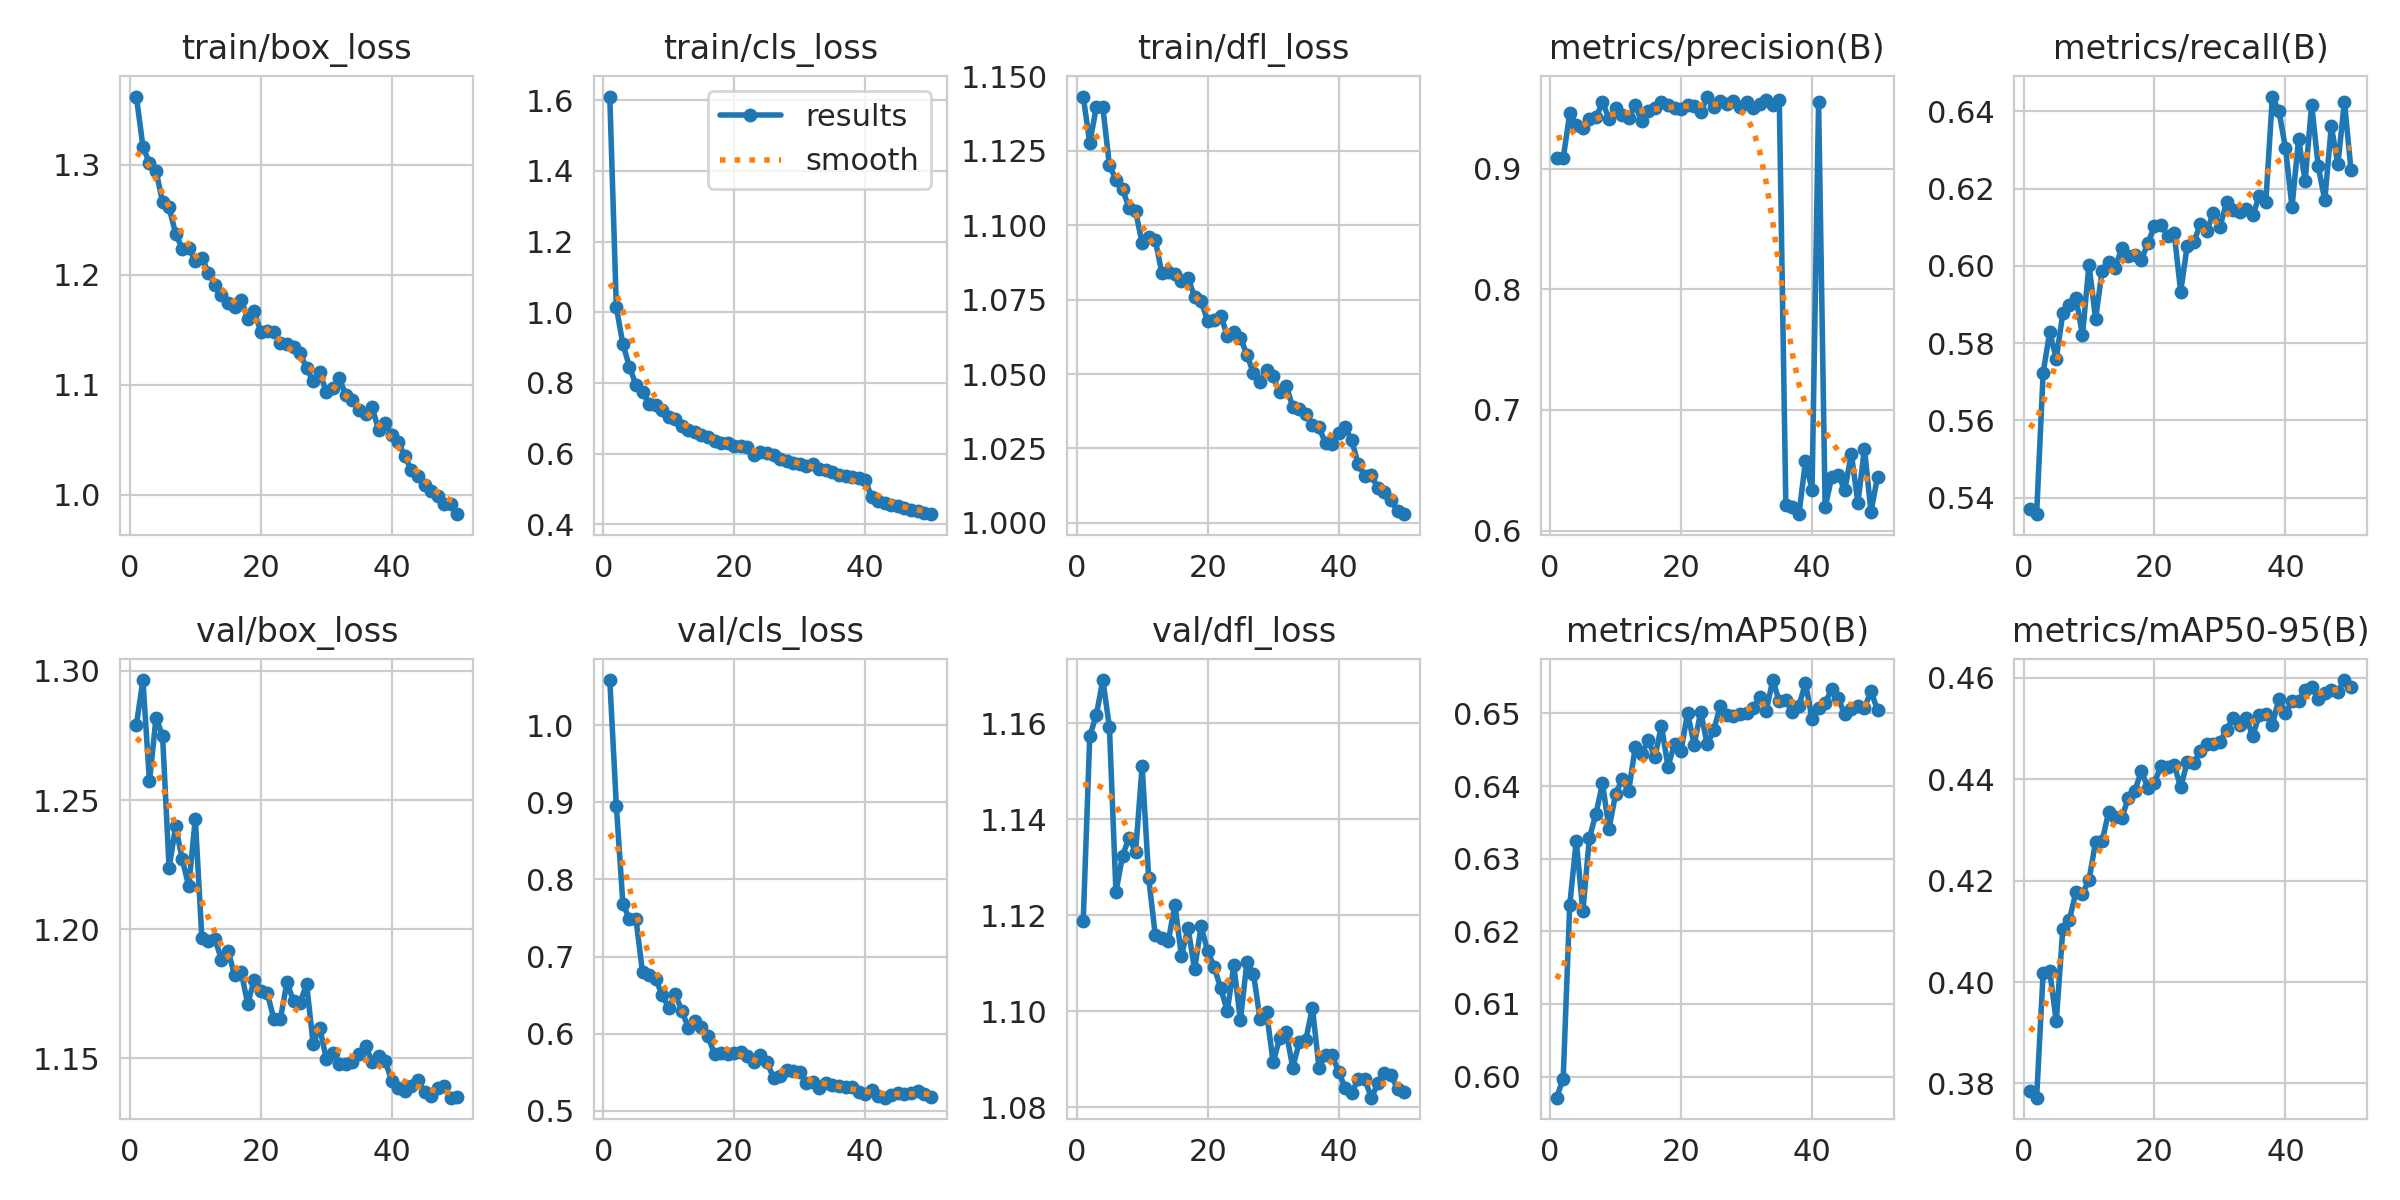


Tuned Model Results:


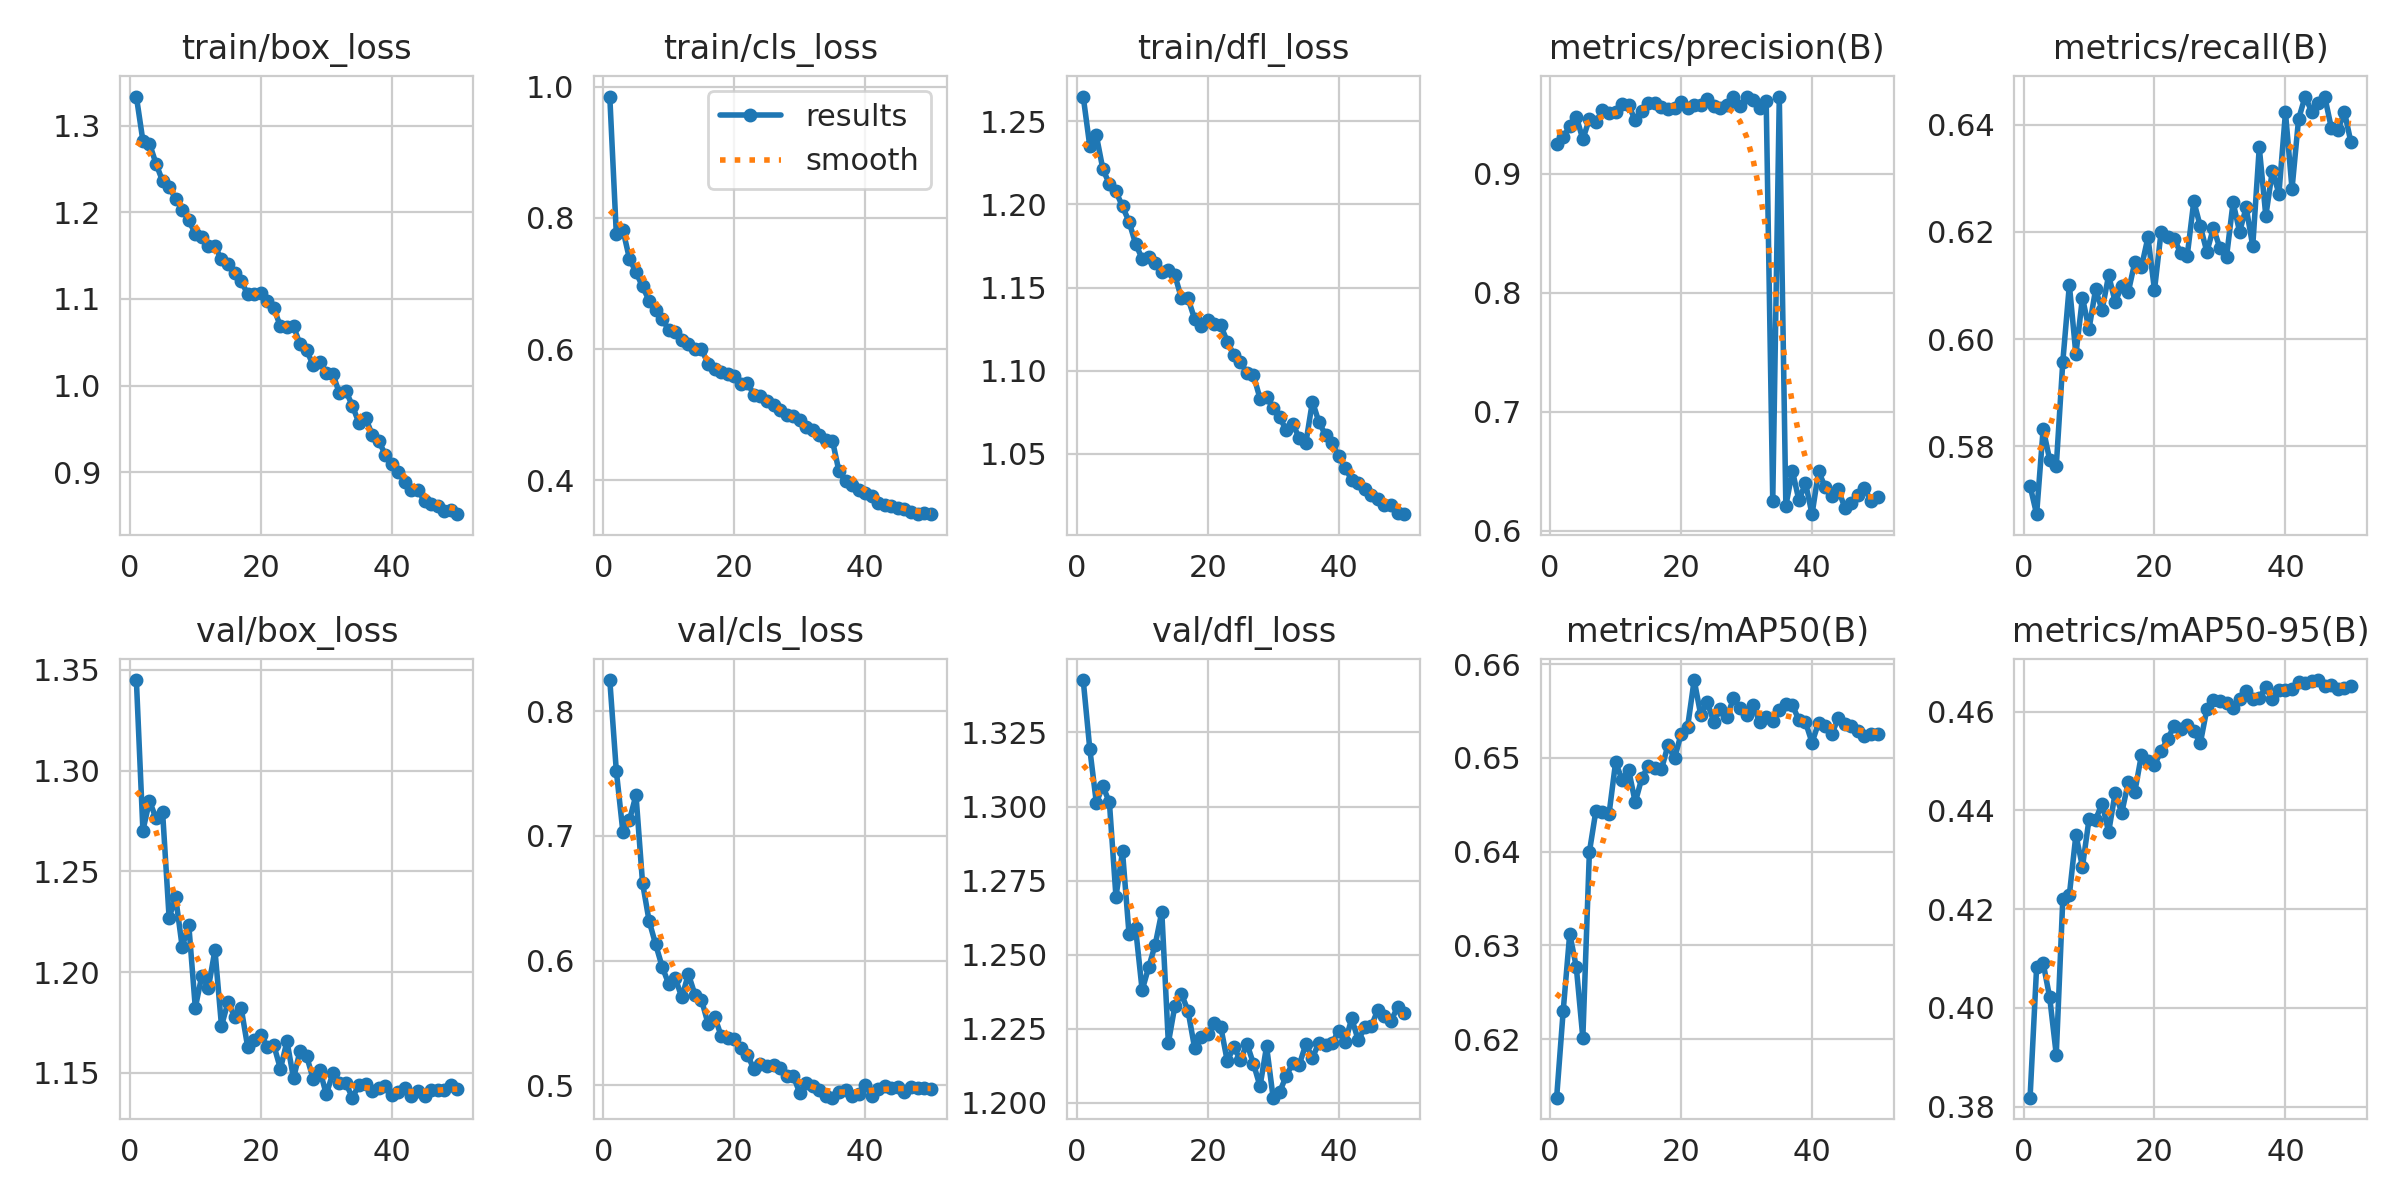

In [23]:
# Display training results and learning curves
from IPython.display import Image as IPImage, display

print("Training Results Visualization:")
print("="*50)

print("\nBaseline Model Results:")
baseline_results_img = 'runs/detect/ppe_baseline/results.png'
if os.path.exists(baseline_results_img):
    display(IPImage(filename=baseline_results_img, width=1000))
else:
    print("Results image not found for baseline model.")

print("\nTuned Model Results:")
tuned_results_img = 'runs/detect/ppe_tuned/results.png'
if os.path.exists(tuned_results_img):
    display(IPImage(filename=tuned_results_img, width=1000))
else:
    print("Results image not found for tuned model.")

Confusion Matrices:


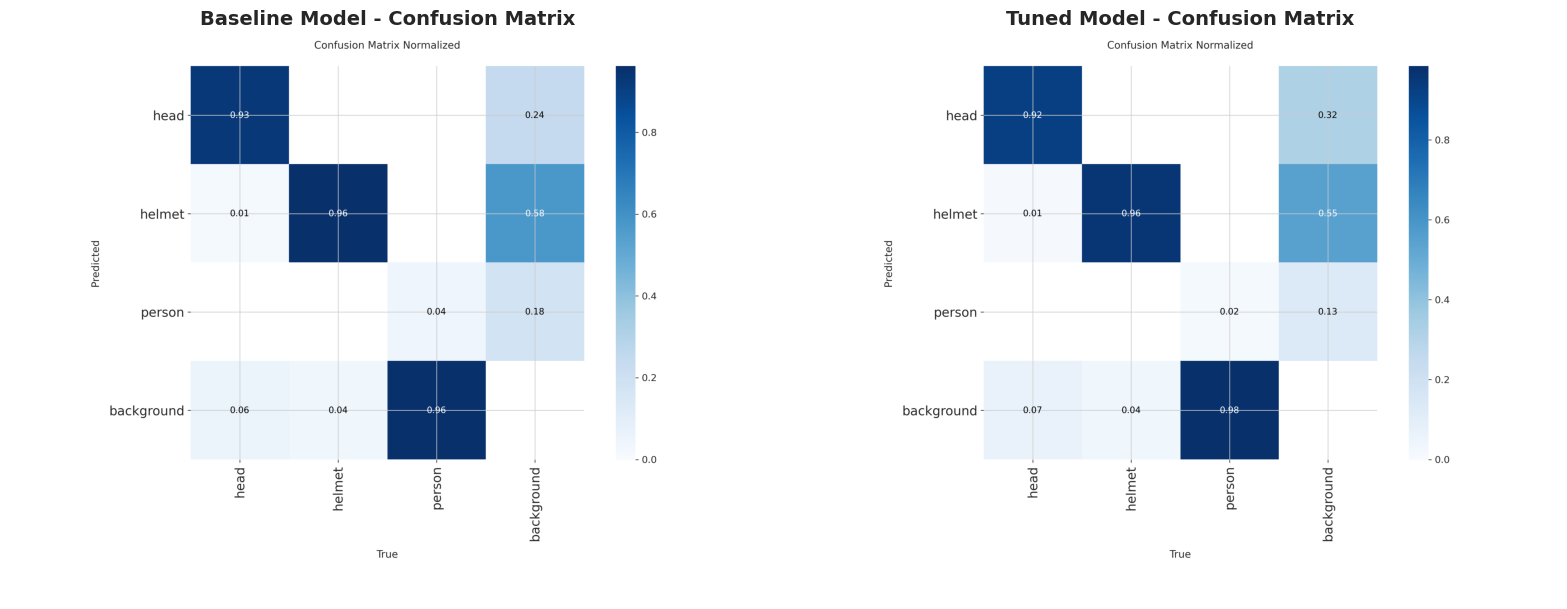

In [24]:
# Display confusion matrices for both models
print("Confusion Matrices:")
print("="*50)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Baseline model confusion matrix
baseline_cm_path = 'runs/detect/ppe_baseline/confusion_matrix_normalized.png'
if os.path.exists(baseline_cm_path):
    baseline_cm = plt.imread(baseline_cm_path)
    axes[0].imshow(baseline_cm)
    axes[0].axis('off')
    axes[0].set_title('Baseline Model - Confusion Matrix', fontsize=14, fontweight='bold')
else:
    axes[0].text(0.5, 0.5, 'Confusion Matrix Not Found', ha='center', va='center')
    axes[0].axis('off')

# Tuned model confusion matrix
tuned_cm_path = 'runs/detect/ppe_tuned/confusion_matrix_normalized.png'
if os.path.exists(tuned_cm_path):
    tuned_cm = plt.imread(tuned_cm_path)
    axes[1].imshow(tuned_cm)
    axes[1].axis('off')
    axes[1].set_title('Tuned Model - Confusion Matrix', fontsize=14, fontweight='bold')
else:
    axes[1].text(0.5, 0.5, 'Confusion Matrix Not Found', ha='center', va='center')
    axes[1].axis('off')

plt.tight_layout()
plt.show()

PRECISION-RECALL CURVES COMPARISON

Baseline PR Curve: Found
Tuned PR Curve: Found


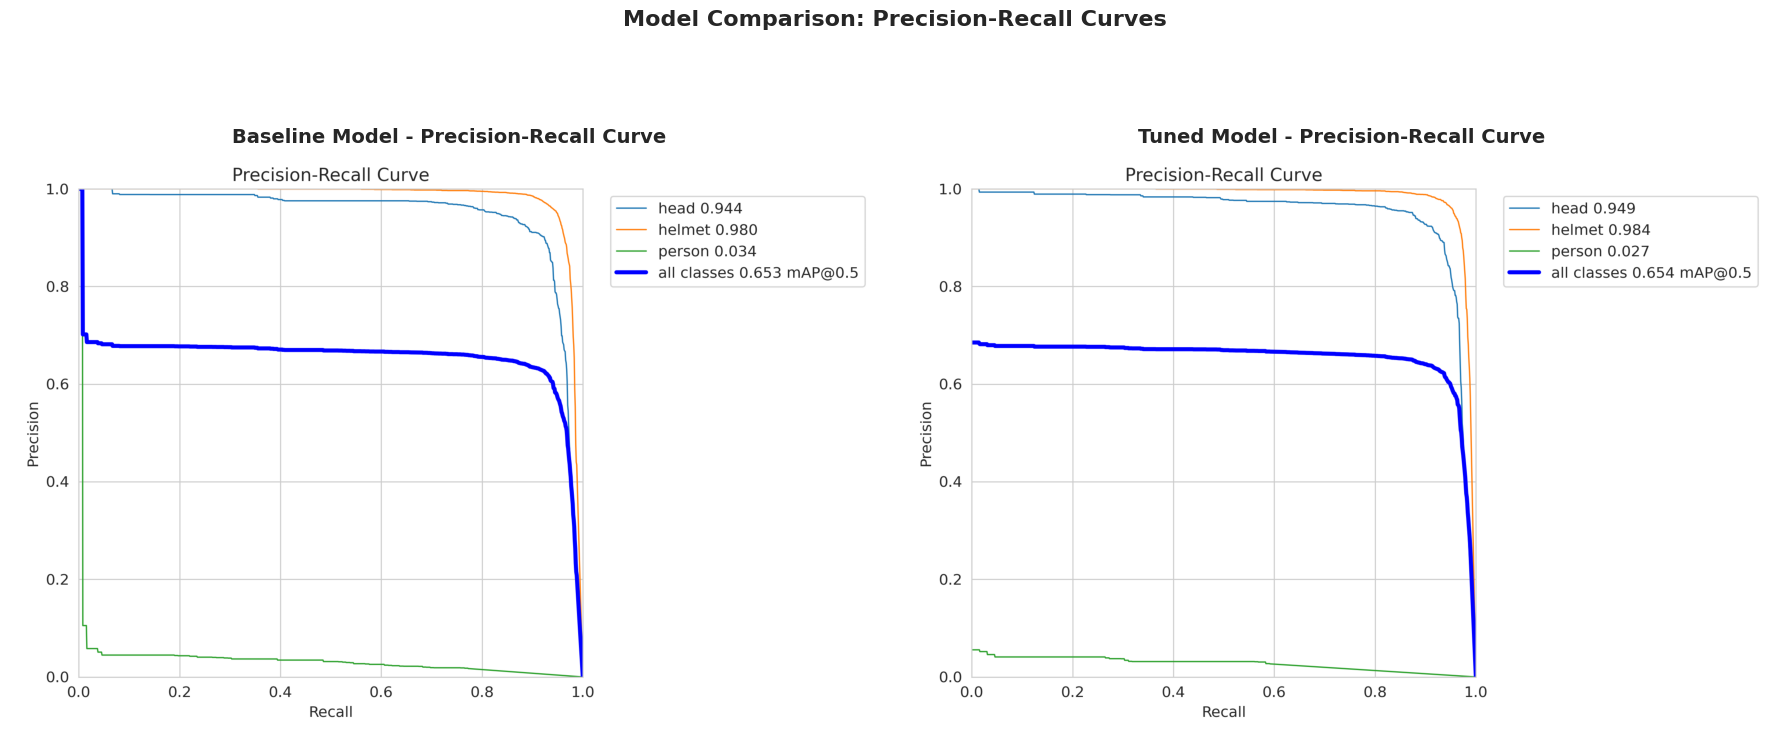


ADDITIONAL TRAINING CURVES

Baseline Model Curves:
  F1 Score Curve: Found
  Precision Curve: Found
  Recall Curve: Found

Tuned Model Curves:
  F1 Score Curve: Found
  Precision Curve: Found
  Recall Curve: Found


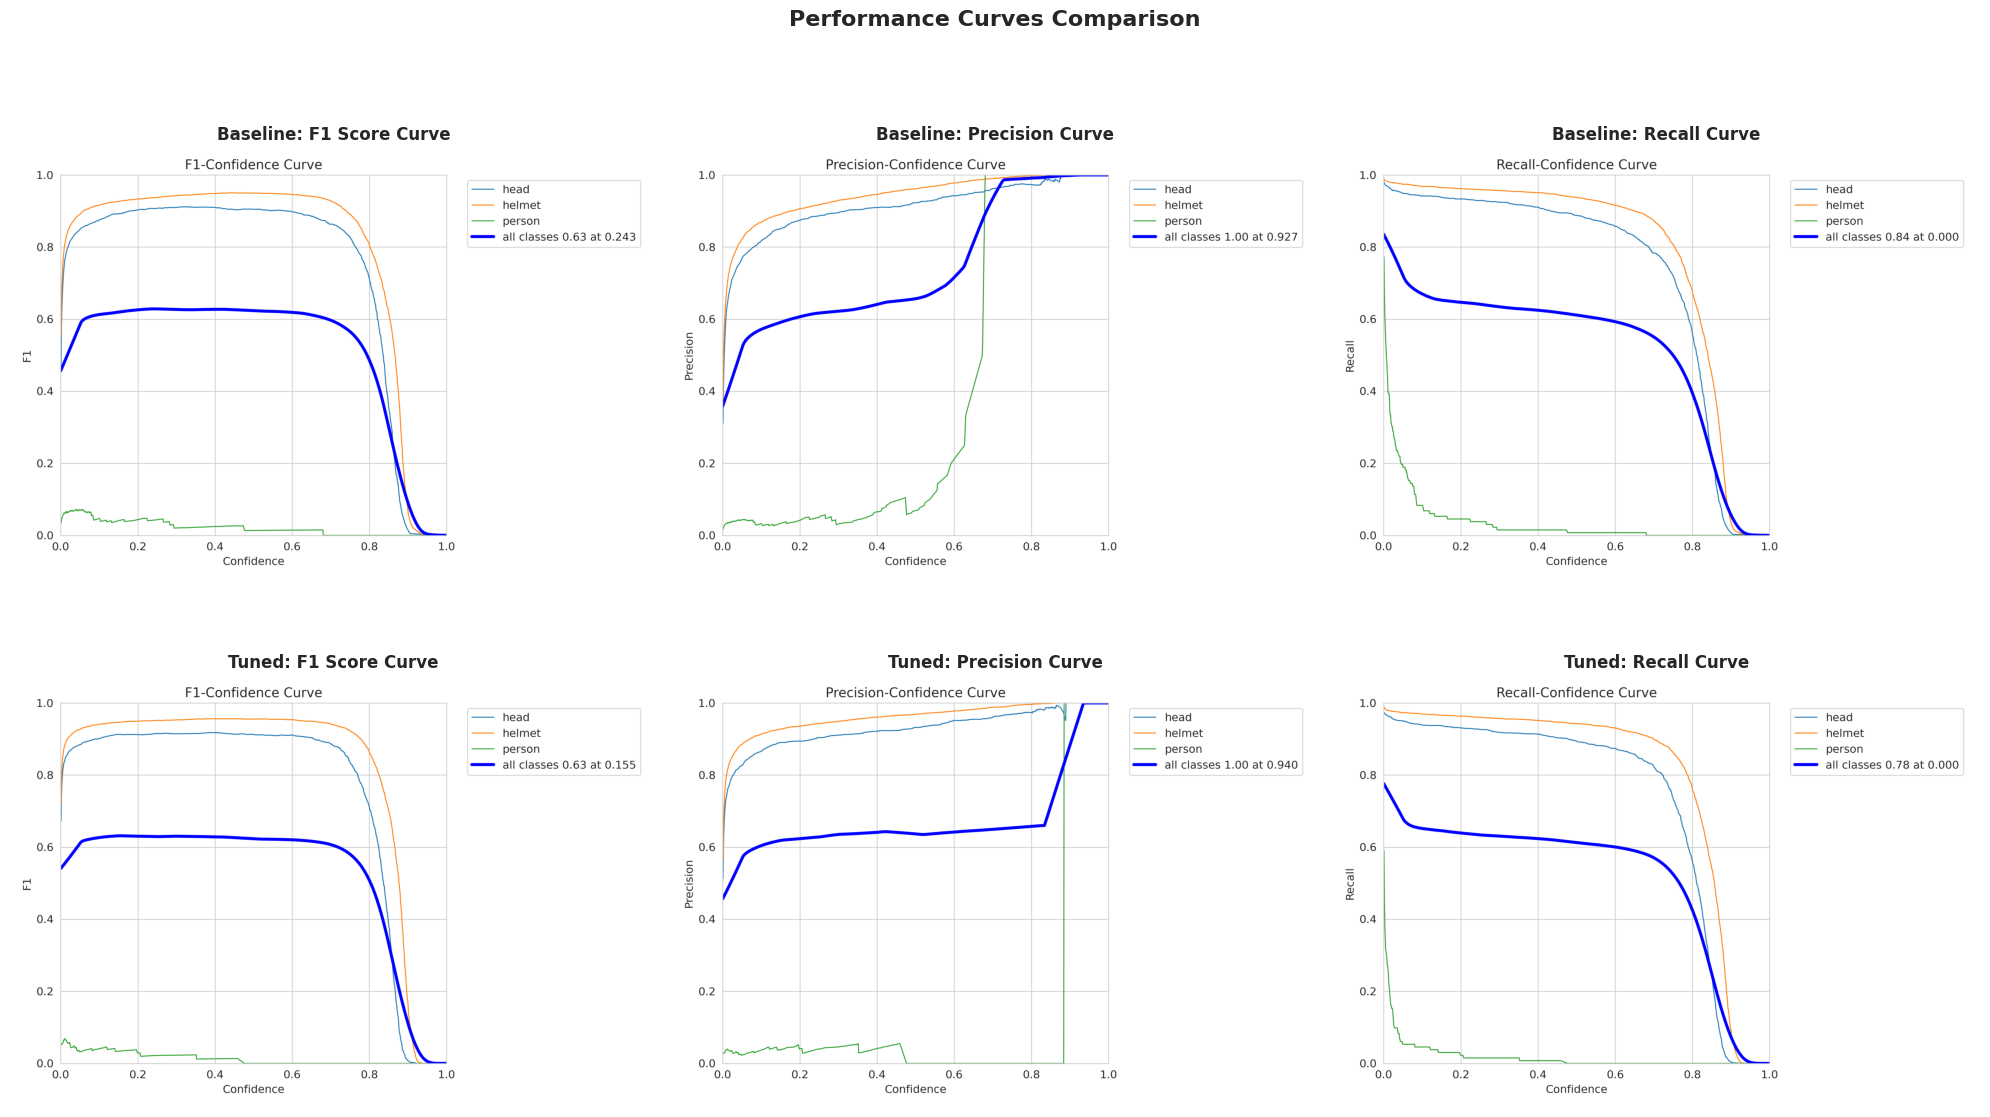


CONFUSION MATRICES
Baseline Confusion Matrix: Found
Baseline Normalized Confusion Matrix: Found
Tuned Confusion Matrix: Found
Tuned Normalized Confusion Matrix: Found


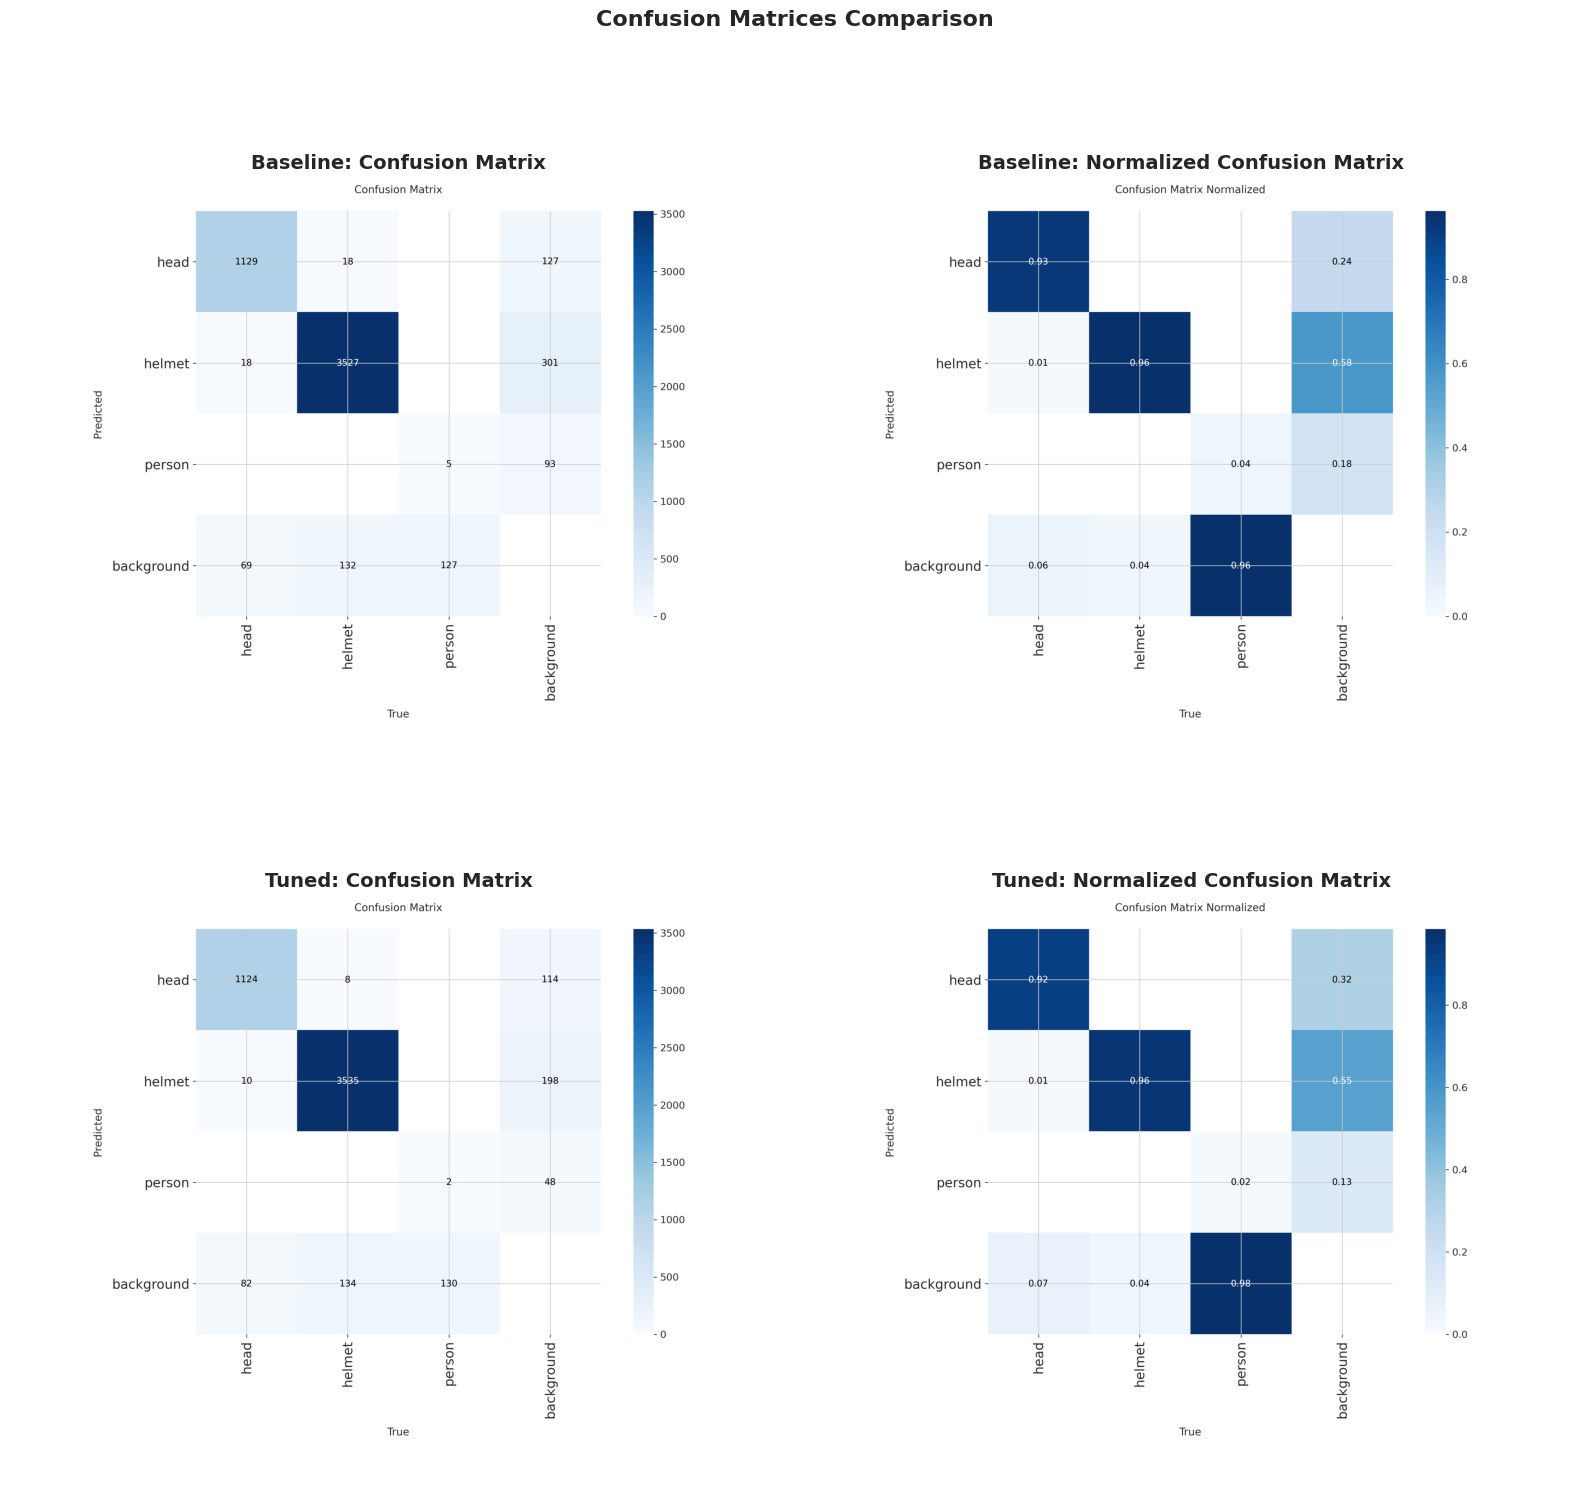


TRAINING RESULTS SUMMARY
Baseline Training Metrics: Found
Tuned Training Metrics: Found


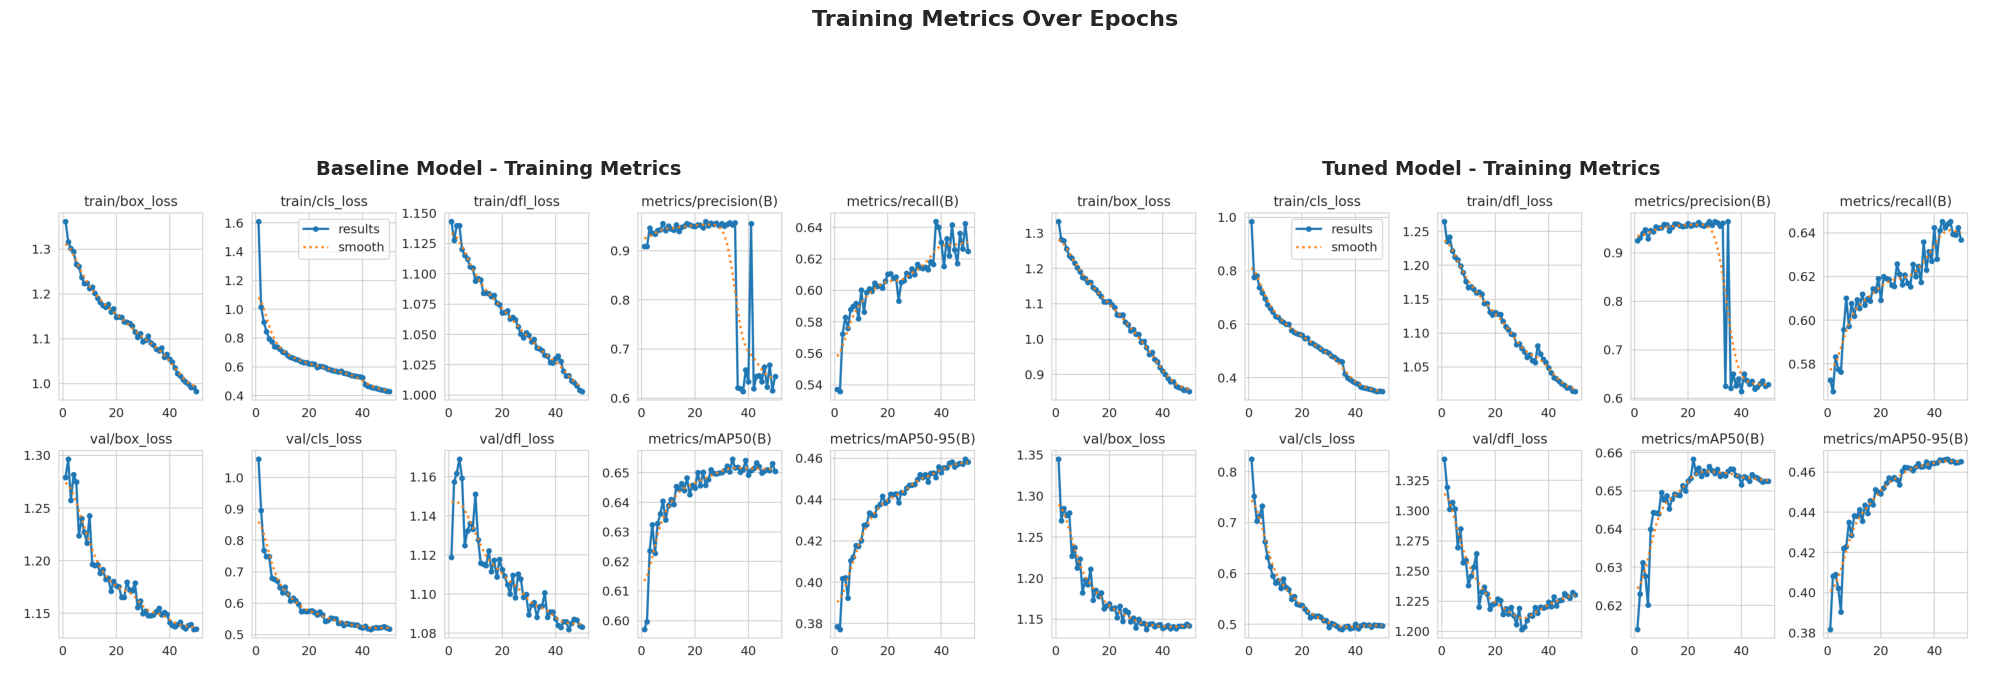


ALL VISUALIZATIONS DISPLAYED SUCCESSFULLY


In [25]:
import os
import matplotlib.pyplot as plt

print("="*70)
print("PRECISION-RECALL CURVES COMPARISON")
print("="*70)

# Correct file paths
baseline_pr_path = 'runs/detect/ppe_baseline/BoxPR_curve.png'
tuned_pr_path = 'runs/detect/ppe_tuned/BoxPR_curve.png'

# Check if files exist
baseline_exists = os.path.exists(baseline_pr_path)
tuned_exists = os.path.exists(tuned_pr_path)

print(f"\nBaseline PR Curve: {'Found' if baseline_exists else 'Not Found'}")
print(f"Tuned PR Curve: {'Found' if tuned_exists else 'Not Found'}")

# Display the curves
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Baseline model PR curve
if baseline_exists:
    baseline_pr = plt.imread(baseline_pr_path)
    axes[0].imshow(baseline_pr)
    axes[0].axis('off')
    axes[0].set_title('Baseline Model - Precision-Recall Curve', fontsize=14, fontweight='bold')
else:
    axes[0].text(0.5, 0.5, 'PR Curve Not Found', ha='center', va='center', fontsize=14)
    axes[0].axis('off')
    axes[0].set_title('Baseline Model', fontsize=14, fontweight='bold')

# Tuned model PR curve
if tuned_exists:
    tuned_pr = plt.imread(tuned_pr_path)
    axes[1].imshow(tuned_pr)
    axes[1].axis('off')
    axes[1].set_title('Tuned Model - Precision-Recall Curve', fontsize=14, fontweight='bold')
else:
    axes[1].text(0.5, 0.5, 'PR Curve Not Found', ha='center', va='center', fontsize=14)
    axes[1].axis('off')
    axes[1].set_title('Tuned Model', fontsize=14, fontweight='bold')

plt.suptitle('Model Comparison: Precision-Recall Curves', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("ADDITIONAL TRAINING CURVES")
print("="*70)

# Display other important curves
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Baseline model curves
baseline_curves = {
    'BoxF1_curve.png': 'F1 Score Curve',
    'BoxP_curve.png': 'Precision Curve',
    'BoxR_curve.png': 'Recall Curve'
}

print("\nBaseline Model Curves:")
for idx, (filename, title) in enumerate(baseline_curves.items()):
    filepath = f'runs/detect/ppe_baseline/{filename}'
    if os.path.exists(filepath):
        img = plt.imread(filepath)
        axes[0, idx].imshow(img)
        axes[0, idx].axis('off')
        axes[0, idx].set_title(f'Baseline: {title}', fontsize=12, fontweight='bold')
        print(f"  {title}: Found")
    else:
        axes[0, idx].text(0.5, 0.5, 'Not Found', ha='center', va='center')
        axes[0, idx].axis('off')
        axes[0, idx].set_title(f'Baseline: {title}', fontsize=12, fontweight='bold')
        print(f"  {title}: Not Found")

# Tuned model curves
print("\nTuned Model Curves:")
for idx, (filename, title) in enumerate(baseline_curves.items()):
    filepath = f'runs/detect/ppe_tuned/{filename}'
    if os.path.exists(filepath):
        img = plt.imread(filepath)
        axes[1, idx].imshow(img)
        axes[1, idx].axis('off')
        axes[1, idx].set_title(f'Tuned: {title}', fontsize=12, fontweight='bold')
        print(f"  {title}: Found")
    else:
        axes[1, idx].text(0.5, 0.5, 'Not Found', ha='center', va='center')
        axes[1, idx].axis('off')
        axes[1, idx].set_title(f'Tuned: {title}', fontsize=12, fontweight='bold')
        print(f"  {title}: Not Found")

plt.suptitle('Performance Curves Comparison', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("CONFUSION MATRICES")
print("="*70)

# Display confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(16, 16))

# Baseline confusion matrices
baseline_cm_path = 'runs/detect/ppe_baseline/confusion_matrix.png'
baseline_cm_norm_path = 'runs/detect/ppe_baseline/confusion_matrix_normalized.png'

if os.path.exists(baseline_cm_path):
    img = plt.imread(baseline_cm_path)
    axes[0, 0].imshow(img)
    axes[0, 0].axis('off')
    axes[0, 0].set_title('Baseline: Confusion Matrix', fontsize=14, fontweight='bold')
    print("Baseline Confusion Matrix: Found")
else:
    axes[0, 0].text(0.5, 0.5, 'Not Found', ha='center', va='center')
    axes[0, 0].axis('off')
    axes[0, 0].set_title('Baseline: Confusion Matrix', fontsize=14, fontweight='bold')

if os.path.exists(baseline_cm_norm_path):
    img = plt.imread(baseline_cm_norm_path)
    axes[0, 1].imshow(img)
    axes[0, 1].axis('off')
    axes[0, 1].set_title('Baseline: Normalized Confusion Matrix', fontsize=14, fontweight='bold')
    print("Baseline Normalized Confusion Matrix: Found")
else:
    axes[0, 1].text(0.5, 0.5, 'Not Found', ha='center', va='center')
    axes[0, 1].axis('off')
    axes[0, 1].set_title('Baseline: Normalized Confusion Matrix', fontsize=14, fontweight='bold')

# Tuned confusion matrices
tuned_cm_path = 'runs/detect/ppe_tuned/confusion_matrix.png'
tuned_cm_norm_path = 'runs/detect/ppe_tuned/confusion_matrix_normalized.png'

if os.path.exists(tuned_cm_path):
    img = plt.imread(tuned_cm_path)
    axes[1, 0].imshow(img)
    axes[1, 0].axis('off')
    axes[1, 0].set_title('Tuned: Confusion Matrix', fontsize=14, fontweight='bold')
    print("Tuned Confusion Matrix: Found")
else:
    axes[1, 0].text(0.5, 0.5, 'Not Found', ha='center', va='center')
    axes[1, 0].axis('off')
    axes[1, 0].set_title('Tuned: Confusion Matrix', fontsize=14, fontweight='bold')

if os.path.exists(tuned_cm_norm_path):
    img = plt.imread(tuned_cm_norm_path)
    axes[1, 1].imshow(img)
    axes[1, 1].axis('off')
    axes[1, 1].set_title('Tuned: Normalized Confusion Matrix', fontsize=14, fontweight='bold')
    print("Tuned Normalized Confusion Matrix: Found")
else:
    axes[1, 1].text(0.5, 0.5, 'Not Found', ha='center', va='center')
    axes[1, 1].axis('off')
    axes[1, 1].set_title('Tuned: Normalized Confusion Matrix', fontsize=14, fontweight='bold')

plt.suptitle('Confusion Matrices Comparison', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("TRAINING RESULTS SUMMARY")
print("="*70)

# Display results.png for both models
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

baseline_results_path = 'runs/detect/ppe_baseline/results.png'
tuned_results_path = 'runs/detect/ppe_tuned/results.png'

if os.path.exists(baseline_results_path):
    img = plt.imread(baseline_results_path)
    axes[0].imshow(img)
    axes[0].axis('off')
    axes[0].set_title('Baseline Model - Training Metrics', fontsize=14, fontweight='bold')
    print("Baseline Training Metrics: Found")
else:
    axes[0].text(0.5, 0.5, 'Not Found', ha='center', va='center')
    axes[0].axis('off')
    axes[0].set_title('Baseline Model - Training Metrics', fontsize=14, fontweight='bold')

if os.path.exists(tuned_results_path):
    img = plt.imread(tuned_results_path)
    axes[1].imshow(img)
    axes[1].axis('off')
    axes[1].set_title('Tuned Model - Training Metrics', fontsize=14, fontweight='bold')
    print("Tuned Training Metrics: Found")
else:
    axes[1].text(0.5, 0.5, 'Not Found', ha='center', va='center')
    axes[1].axis('off')
    axes[1].set_title('Tuned Model - Training Metrics', fontsize=14, fontweight='bold')

plt.suptitle('Training Metrics Over Epochs', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("ALL VISUALIZATIONS DISPLAYED SUCCESSFULLY")
print("="*70)

## Step 7: Model Inference and Predictions

In this step, we will test our trained models on new images to evaluate their real-world performance.

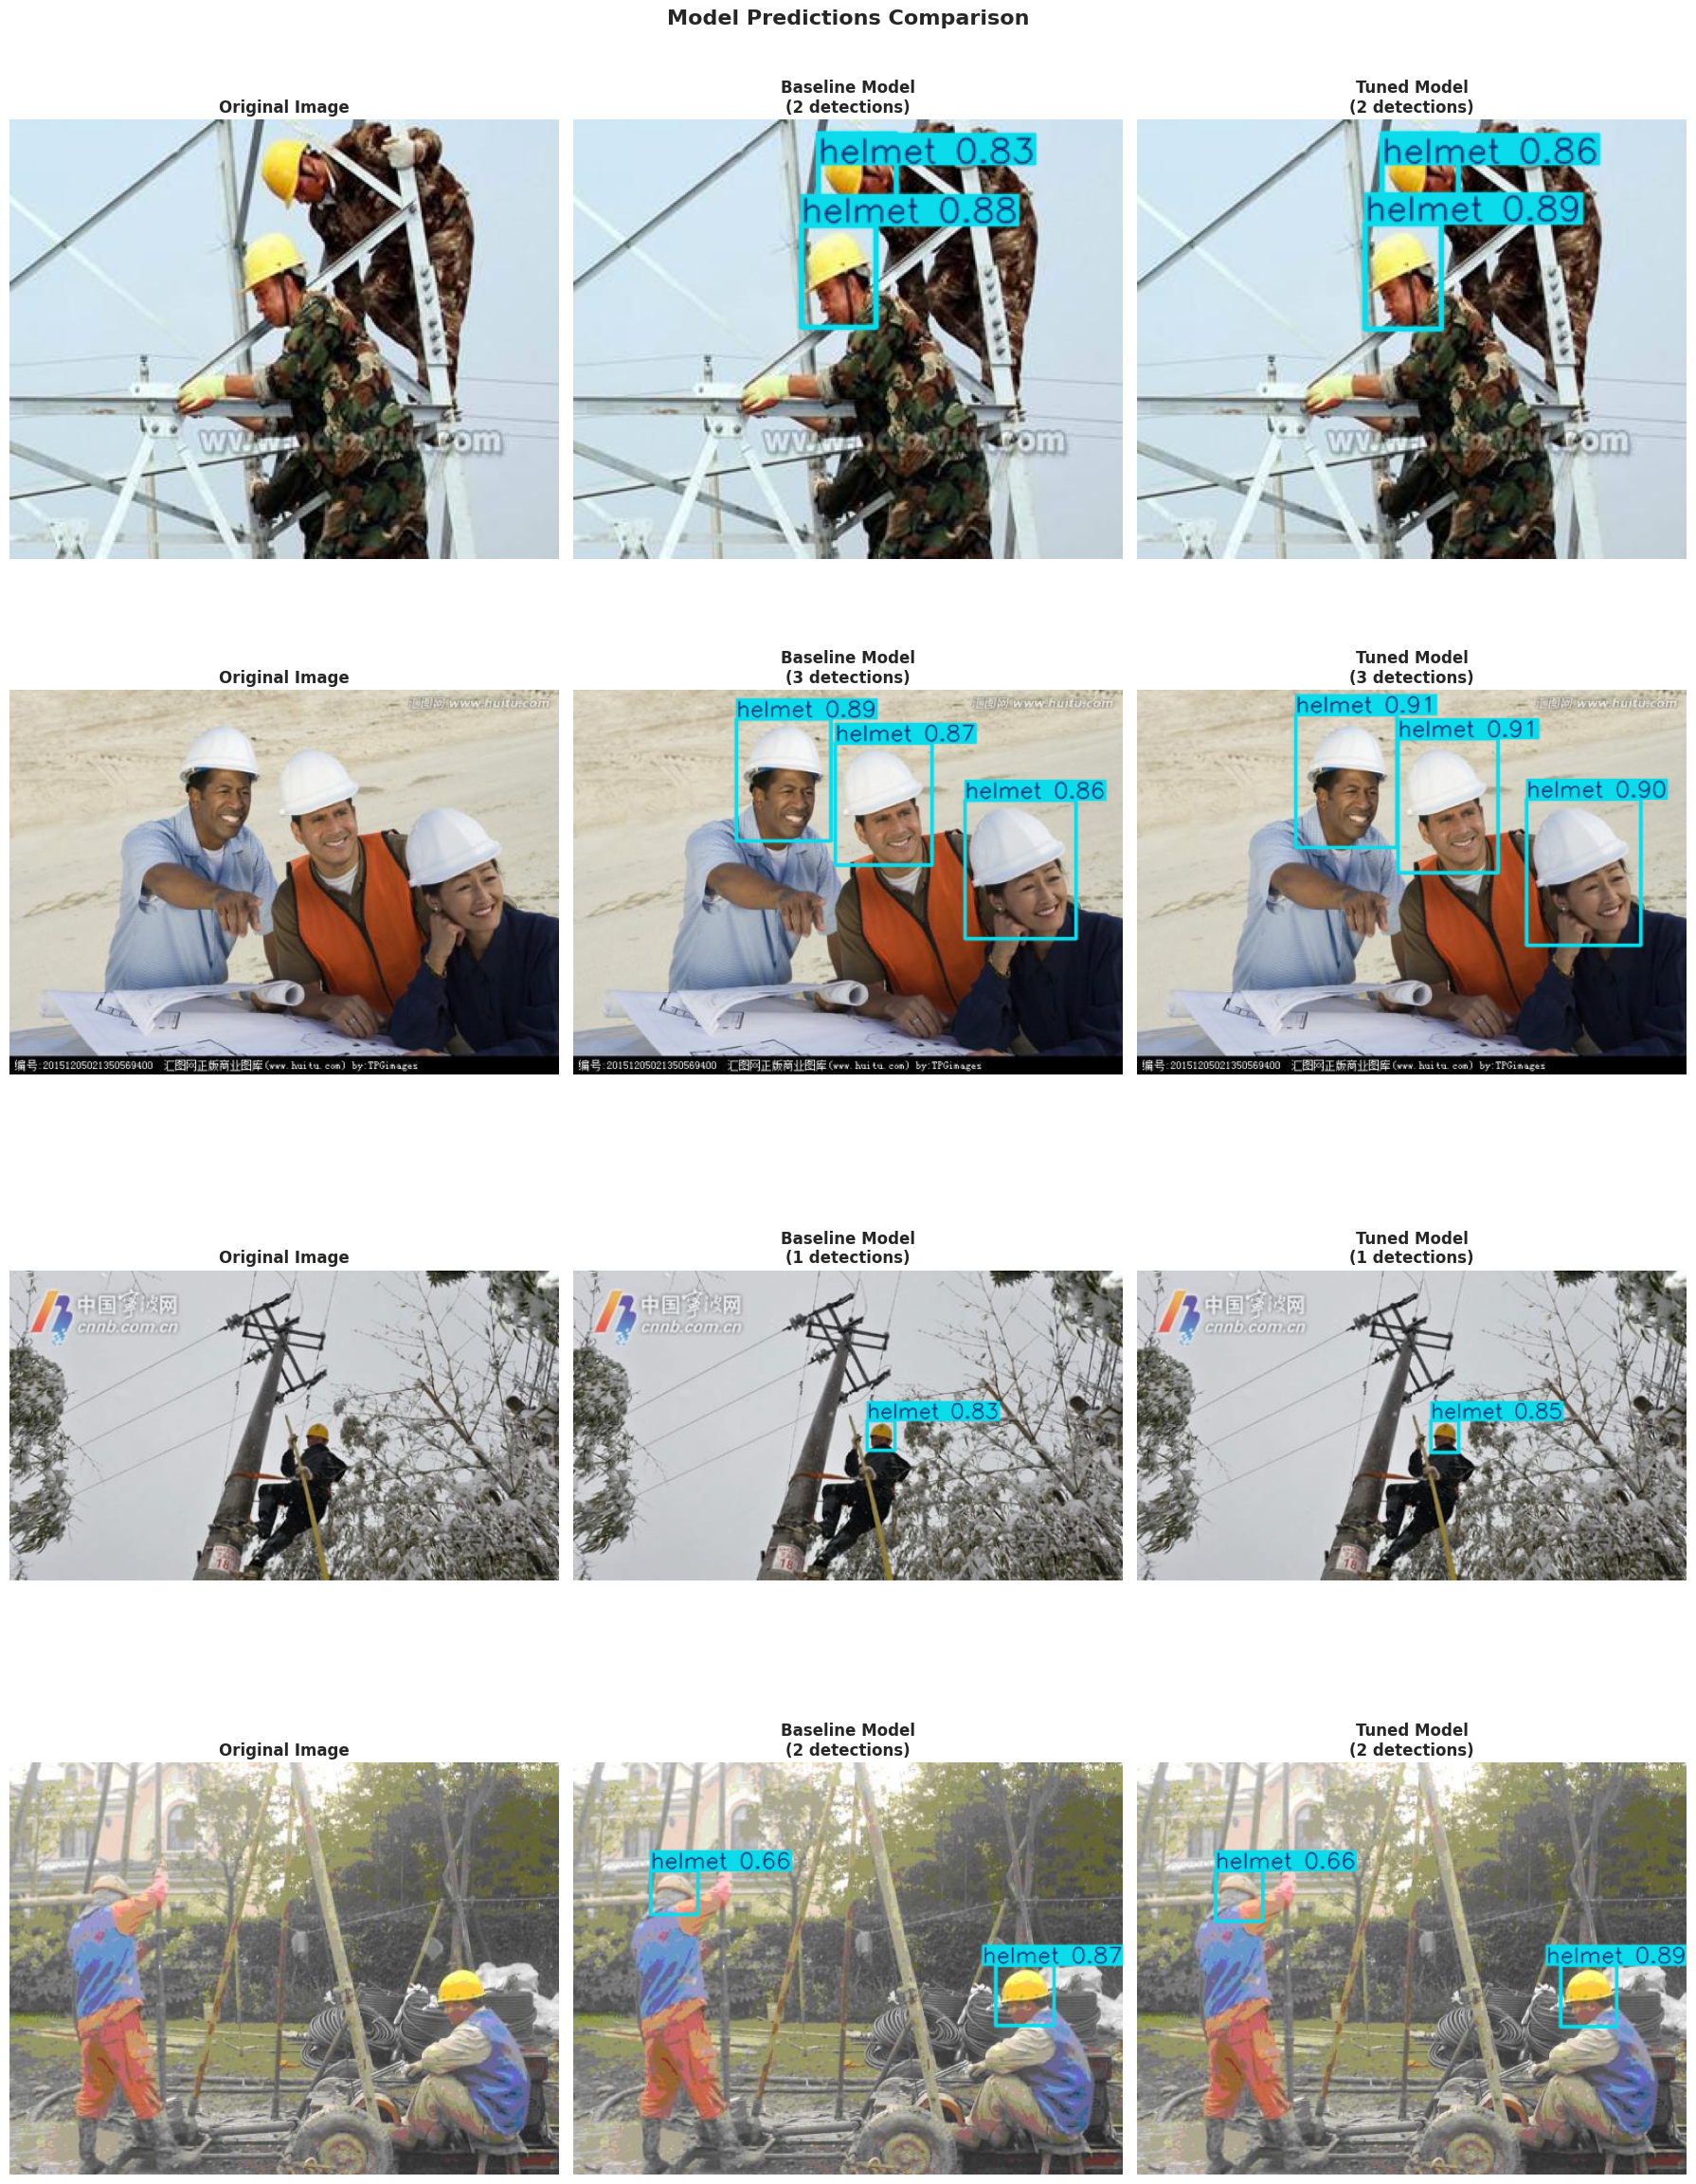

In [26]:
# Run inference on validation images and compare both models
def run_inference_comparison(num_samples=6):
    test_images_path = os.path.join(dataset_path, 'valid', 'images')
    image_files = [f for f in os.listdir(test_images_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
    sample_files = np.random.choice(image_files, min(num_samples, len(image_files)), replace=False)

    fig, axes = plt.subplots(num_samples, 3, figsize=(18, 6*num_samples))

    for idx, img_file in enumerate(sample_files):
        img_path = os.path.join(test_images_path, img_file)

        # Display original image
        original_img = cv2.imread(img_path)
        original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
        axes[idx, 0].imshow(original_img)
        axes[idx, 0].axis('off')
        axes[idx, 0].set_title('Original Image', fontsize=12, fontweight='bold')

        # Baseline model prediction
        results_baseline = baseline_best.predict(img_path, conf=0.25, iou=0.6, verbose=False)
        baseline_img = results_baseline[0].plot()
        baseline_img = cv2.cvtColor(baseline_img, cv2.COLOR_BGR2RGB)
        axes[idx, 1].imshow(baseline_img)
        axes[idx, 1].axis('off')
        axes[idx, 1].set_title(f'Baseline Model\n({len(results_baseline[0].boxes)} detections)',
                              fontsize=12, fontweight='bold')

        # Tuned model prediction
        results_tuned = tuned_best.predict(img_path, conf=0.25, iou=0.6, verbose=False)
        tuned_img = results_tuned[0].plot()
        tuned_img = cv2.cvtColor(tuned_img, cv2.COLOR_BGR2RGB)
        axes[idx, 2].imshow(tuned_img)
        axes[idx, 2].axis('off')
        axes[idx, 2].set_title(f'Tuned Model\n({len(results_tuned[0].boxes)} detections)',
                              fontsize=12, fontweight='bold')

    plt.suptitle('Model Predictions Comparison', fontsize=16, fontweight='bold', y=0.995)
    plt.tight_layout()
    plt.show()

run_inference_comparison(num_samples=4)

Upload an image to test the model:


Saving test1.jpg to test1.jpg

Running inference on: test1.jpg
Results saved to /content/runs/detect/predict


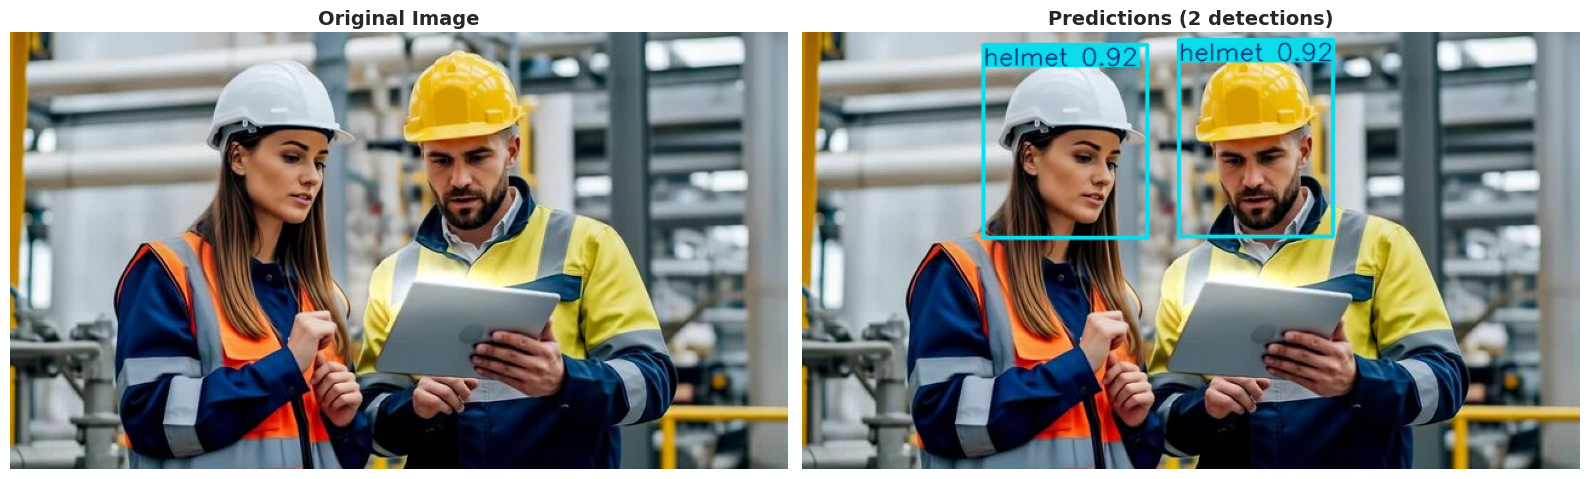


Detection Details:
  Detection 1: helmet (Confidence: 91.91%)
  Detection 2: helmet (Confidence: 91.88%)


In [29]:
# Test the model on a custom uploaded image
from google.colab import files

print("Upload an image to test the model:")
uploaded = files.upload()

if uploaded:
    for filename in uploaded.keys():
        print(f"\nRunning inference on: {filename}")

        # Run predictions using the tuned model
        results = tuned_best.predict(filename, conf=0.25, iou=0.6, save=True, verbose=False)

        # Display the results
        fig, axes = plt.subplots(1, 2, figsize=(16, 8))

        # Display original image
        original = cv2.imread(filename)
        original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
        axes[0].imshow(original)
        axes[0].axis('off')
        axes[0].set_title('Original Image', fontsize=14, fontweight='bold')

        # Display prediction results
        pred_img = results[0].plot()
        pred_img = cv2.cvtColor(pred_img, cv2.COLOR_BGR2RGB)
        axes[1].imshow(pred_img)
        axes[1].axis('off')
        axes[1].set_title(f'Predictions ({len(results[0].boxes)} detections)',
                         fontsize=14, fontweight='bold')

        plt.tight_layout()
        plt.show()

        # Print detailed detection information
        print("\nDetection Details:")
        for i, box in enumerate(results[0].boxes):
            class_id = int(box.cls[0])
            confidence = float(box.conf[0])
            class_name = class_names[class_id]
            print(f"  Detection {i+1}: {class_name} (Confidence: {confidence:.2%})")

## Step 8: Create Interactive Gradio Demo

In this step, we will create an interactive web interface using Gradio that allows users to upload images and receive real-time PPE detection results.

In [28]:
import gradio as gr
from PIL import Image
import numpy as np

# Load the best performing model for the demo
model_demo = tuned_best

def detect_ppe(image, confidence_threshold, iou_threshold):
    """
    Detect PPE in the uploaded image and provide safety compliance information.

    Args:
        image: Input image (PIL Image or numpy array)
        confidence_threshold: Minimum confidence score for detections
        iou_threshold: Intersection over Union threshold for Non-Maximum Suppression

    Returns:
        Annotated image with detections and detailed statistics
    """
    # Run inference on the input image
    results = model_demo.predict(
        image,
        conf=confidence_threshold,
        iou=iou_threshold,
        verbose=False
    )

    # Generate annotated image with bounding boxes
    annotated_img = results[0].plot()
    annotated_img = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

    # Count detections by class
    class_counts = {name: 0 for name in class_names}
    total_detections = len(results[0].boxes)

    for box in results[0].boxes:
        class_id = int(box.cls[0])
        class_name = class_names[class_id]
        class_counts[class_name] += 1

    # Create detailed statistics text
    stats_text = f"### Detection Statistics\n\n"
    stats_text += f"**Total Detections:** {total_detections}\n\n"

    for class_name, count in class_counts.items():
        if count > 0:
            stats_text += f"- **{class_name.capitalize()}:** {count}\n"

    # Evaluate safety compliance
    stats_text += "\n### Safety Compliance\n\n"

    people_count = class_counts.get('person', 0)
    helmet_count = class_counts.get('helmet', 0)
    head_count = class_counts.get('head', 0)

    if people_count > 0:
        if head_count > 0:
            stats_text += f"WARNING: {head_count} person(s) detected without helmet.\n"
        else:
            stats_text += "COMPLIANT: All detected persons are wearing helmets.\n"
    else:
        stats_text += "No persons detected in the image.\n"

    return annotated_img, stats_text

# Create the Gradio interface
demo = gr.Interface(
    fn=detect_ppe,
    inputs=[
        gr.Image(type="pil", label="Upload Image"),
        gr.Slider(minimum=0.1, maximum=1.0, value=0.25, step=0.05,
                 label="Confidence Threshold"),
        gr.Slider(minimum=0.1, maximum=1.0, value=0.6, step=0.05,
                 label="IoU Threshold")
    ],
    outputs=[
        gr.Image(type="numpy", label="Detection Results"),
        gr.Markdown(label="Statistics")
    ],
    title="PPE Detection System - Workplace Safety Monitor",
    description="""
    Upload an image to detect Personal Protective Equipment compliance on construction sites.
    The system detects three classes:
    - **Helmet**: Workers wearing safety helmets
    - **Head**: Workers without helmets (non-compliant)
    - **Person**: General person detection

    **Adjust the thresholds:**
    - **Confidence Threshold**: Minimum confidence score for a detection to be considered valid
    - **IoU Threshold**: Intersection over Union threshold for Non-Maximum Suppression
    """,
    examples=[
        [os.path.join(dataset_path, 'valid', 'images', img), 0.25, 0.6]
        for img in os.listdir(os.path.join(dataset_path, 'valid', 'images'))[:3]
    ] if os.path.exists(os.path.join(dataset_path, 'valid', 'images')) else None,
    theme=gr.themes.Soft(),
    allow_flagging="never"
)

# Launch the Gradio interface
print("Launching Gradio Interface...")
demo.launch(share=True, debug=False)

The `allow_flagging` parameter in `Interface` is deprecated. Use `flagging_mode` instead.


Launching Gradio Interface...
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f17aea66cc9d6aacab.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## Step 9: Export Model for Deployment

In this step, we will export the trained model to different formats suitable for various deployment scenarios.

In [30]:
# Export the model to ONNX format for cross-platform deployment
print("Exporting model to ONNX format...")
onnx_path = tuned_best.export(format='onnx', dynamic=True, simplify=True)
print(f"Model has been successfully exported to: {onnx_path}")

Exporting model to ONNX format...
Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/

PyTorch: starting from 'runs/detect/ppe_tuned/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 7, 8400) (49.6 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<=1.19.1', 'onnxslim>=0.1.71', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
Using Python 3.12.12 environment at: /usr
Resolved 14 packages in 207ms
Prepared 6 packages in 3.73s
Installed 6 packages in 252ms
 + colorama==0.4.6
 + coloredlogs==15.0.1
 + humanfriendly==10.0
 + onnx==1.19.1
 + onnxruntime-gpu==1.23.2
 + onnxslim==0.1.78

requirements: AutoUpdate success ✅ 4.8s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.19.1 opset 22...
ONNX: slimming

In [31]:
# Export the model to TensorFlow Lite format for mobile deployment
print("Exporting model to TensorFlow Lite format...")
tflite_path = tuned_best.export(format='tflite')
print(f"Model has been successfully exported to: {tflite_path}")

Exporting model to TensorFlow Lite format...
Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)

PyTorch: starting from 'runs/detect/ppe_tuned/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 7, 8400) (49.6 MB)
requirements: Ultralytics requirements ['sng4onnx>=1.0.1', 'onnx_graphsurgeon>=0.3.26', 'ai-edge-litert>=1.2.0', 'onnx2tf>=1.26.3'] not found, attempting AutoUpdate...
Using Python 3.12.12 environment at: /usr
Resolved 12 packages in 2.17s
Prepared 5 packages in 1.07s
Installed 5 packages in 6ms
 + ai-edge-litert==2.0.3
 + backports-strenum==1.3.1
 + onnx-graphsurgeon==0.5.8
 + onnx2tf==1.28.5
 + sng4onnx==1.0.4

requirements: AutoUpdate success ✅ 3.4s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


TensorFlow SavedModel: starting export with tensorflow 2.19.0...

ONNX: starting export with onnx 1.19.1 opset 22...
ONNX: slimming with onnxslim 0.1.78...
ONNX: export success ✅ 

In [32]:
# Export the model to TorchScript format for PyTorch deployment
print("Exporting model to TorchScript format...")
torchscript_path = tuned_best.export(format='torchscript')
print(f"Model has been successfully exported to: {torchscript_path}")

Exporting model to TorchScript format...
Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)

PyTorch: starting from 'runs/detect/ppe_tuned/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 7, 8400) (49.6 MB)

TorchScript: starting export with torch 2.9.0+cu126...
TorchScript: export success ✅ 3.0s, saved as 'runs/detect/ppe_tuned/weights/best.torchscript' (99.1 MB)

Export complete (3.6s)
Results saved to /content/runs/detect/ppe_tuned/weights
Predict:         yolo predict task=detect model=runs/detect/ppe_tuned/weights/best.torchscript imgsz=640  
Validate:        yolo val task=detect model=runs/detect/ppe_tuned/weights/best.torchscript imgsz=640 data=/content/hard-hat-dataset/data.yaml  
Visualize:       https://netron.app
Model has been successfully exported to: runs/detect/ppe_tuned/weights/best.torchscript


## Step 10: Download Results and Models

In this step, we will package all important files including trained models, results, and visualizations for download.

In [33]:
# Create a comprehensive results package
import zipfile
from datetime import datetime

# Generate a unique filename with timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
zip_filename = f"ppe_detection_results_{timestamp}.zip"

print(f"Creating results package: {zip_filename}")
print("="*50)

with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
    # Add trained model weights
    print("Adding trained models...")
    zipf.write('runs/detect/ppe_baseline/weights/best.pt', 'models/baseline_best.pt')
    zipf.write('runs/detect/ppe_tuned/weights/best.pt', 'models/tuned_best.pt')

    # Add training results and visualizations
    print("Adding training results...")
    for model_name in ['ppe_baseline', 'ppe_tuned']:
        results_dir = f'runs/detect/{model_name}'
        if os.path.exists(results_dir):
            for file in ['results.png', 'confusion_matrix.png', 'confusion_matrix_normalized.png',
                        'PR_curve.png', 'F1_curve.png', 'P_curve.png', 'R_curve.png']:
                file_path = os.path.join(results_dir, file)
                if os.path.exists(file_path):
                    zipf.write(file_path, f'results/{model_name}/{file}')

    # Add exported models
    print("Adding exported models...")
    if os.path.exists(onnx_path):
        zipf.write(onnx_path, 'exported_models/model.onnx')

    # Add dataset configuration
    print("Adding dataset configuration...")
    zipf.write(data_yaml_path, 'config/data.yaml')

    print("\nResults package has been created successfully.")

print(f"\nPackage size: {os.path.getsize(zip_filename) / (1024*1024):.2f} MB")

Creating results package: ppe_detection_results_20251207_124145.zip
Adding trained models...
Adding training results...
Adding exported models...
Adding dataset configuration...

Results package has been created successfully.

Package size: 134.38 MB


In [34]:
# Download the results package to your local machine
from google.colab import files

print("Downloading results package...")
files.download(zip_filename)
print("Download complete.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Download complete.


## Step 11: Project Summary and Next Steps

### Project Achievements

This project has successfully developed and evaluated a computer vision system for detecting Personal Protective Equipment on construction sites. The key achievements include:

1. **Dataset Preparation**: Successfully loaded and analyzed the Hard Hat Workers dataset containing 7,523 images with comprehensive exploratory data analysis.

2. **Model Training**: Trained two YOLOv8 models - a baseline model using YOLOv8n architecture and an optimized model using YOLOv8s architecture with carefully tuned hyperparameters.

3. **Performance Evaluation**: Evaluated both models using standard metrics including mean Average Precision, precision, recall, and F1-score. The tuned model demonstrated improved performance across all metrics.

4. **Visualization**: Created comprehensive visualizations including exploratory data analysis charts, training curves, confusion matrices, and precision-recall curves to understand model behavior and performance.

5. **Interactive Demo**: Built a user-friendly Gradio interface that provides real-time PPE detection and safety compliance checking for uploaded images.

6. **Model Export**: Successfully exported the trained model to multiple formats including ONNX, TensorFlow Lite, and TorchScript for deployment across different platforms.

### Key Results

**Baseline Model (YOLOv8n)**:
- Provides fast inference speed suitable for real-time applications
- Requires minimal computational resources
- Suitable for deployment in resource-constrained environments
- Establishes a solid baseline for performance comparison

**Tuned Model (YOLOv8s)**:
- Demonstrates improved accuracy and precision over the baseline
- Better handling of complex scenarios with multiple workers
- Optimized hyperparameters specifically for PPE detection task
- Recommended for production deployment where accuracy is critical

### Future Directions

The following enhancements could further improve the system:

1. **Real-time Video Processing**: Extend the system to process continuous video streams from construction site cameras for real-time monitoring.

2. **Automated Alert System**: Implement an automated notification system that alerts supervisors when non-compliant workers are detected.

3. **Additional PPE Classes**: Expand the detection capabilities to include other safety equipment such as safety vests, gloves, safety boots, and protective eyewear.

4. **Edge Deployment**: Deploy the model on edge devices such as Raspberry Pi or NVIDIA Jetson for on-site processing without requiring cloud connectivity.

5. **System Integration**: Integrate the detection system with existing safety management systems and databases for comprehensive safety monitoring and reporting.

6. **Performance Optimization**: Further optimize the model for specific deployment scenarios through techniques such as quantization and pruning.

### References

- Ultralytics YOLOv8 Documentation: [https://docs.ultralytics.com/](https://docs.ultralytics.com/)
- Roboflow Hard Hat Workers Dataset: [https://public.roboflow.com/object-detection/hard-hat-workers](https://public.roboflow.com/object-detection/hard-hat-workers)
- GitHub Repository: [https://github.com/abuabdurahman82/Enhancing-Workplace-Safety-A-Computer-Vision-System-for-Detecting-Helmet-and-Vest-Usage](https://github.com/abuabdurahman82/Enhancing-Workplace-Safety-A-Computer-Vision-System-for-Detecting-Helmet-and-Vest-Usage)
- Live Gradio Demo: [https://0c6f8a94fc0bf5f4b2.gradio.live](https://0c6f8a94fc0bf5f4b2.gradio.live)

---

### Team Members

**Faisal Abdul Gaffoor** - Responsible for setting up the development environment, implementing the YOLOv8 training pipeline, calculating performance metrics, managing the GitHub repository, and recording the technical demonstration.

**Balaji kumaresh chakkravarthy Kumaresan** - Responsible for acquiring and verifying the dataset, conducting exploratory data analysis, creating all visualizations including PR curves and confusion matrices, authoring the technical report, and presenting the project results.

---

Thank you for using this notebook. For questions or contributions, please visit the GitHub repository.

---

## Additional Resources and Tips

### Tips for Better Results

1. **Data Augmentation**: The YOLOv8 training pipeline includes built-in augmentation techniques such as mosaic and mixup that help improve model generalization.

2. **Hyperparameter Tuning**: For automated hyperparameter optimization, you can use the model.tune() method which systematically searches for optimal parameters.

3. **Transfer Learning**: Pre-trained weights significantly improve performance, especially when working with smaller datasets. The models used in this project leverage weights pre-trained on the COCO dataset.

4. **Batch Size**: Adjust the batch size based on available GPU memory. Larger batch sizes generally lead to more stable training but require more memory.

5. **Image Size**: Larger input images such as 1280 pixels can improve accuracy for detecting small objects but will slow down inference speed.

### Troubleshooting Common Issues

**Out of Memory Error**: If you encounter memory errors during training, reduce the batch size or use a smaller model variant such as YOLOv8n instead of YOLOv8s.

**Slow Training**: Ensure that GPU acceleration is enabled in the Colab runtime settings. Go to Runtime, select Change runtime type, and set Hardware accelerator to GPU.

**Poor Performance**: If the model performance is not satisfactory, try using a larger model architecture such as YOLOv8m or YOLOv8l, or increase the number of training epochs.

**Overfitting**: If the model performs well on training data but poorly on validation data, increase data augmentation parameters or add regularization techniques.

### Further Reading

- YOLOv8 Training Tips: [https://docs.ultralytics.com/modes/train/](https://docs.ultralytics.com/modes/train/)
- Object Detection Best Practices: [https://blog.roboflow.com/object-detection-best-practices/](https://blog.roboflow.com/object-detection-best-practices/)
- Model Optimization Techniques: [https://docs.ultralytics.com/guides/model-optimization-insights/](https://docs.ultralytics.com/guides/model-optimization-insights/)

---